 # **<font color='blue'/>Importation des packages et chargement des données**

---



Importation des packages

In [88]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, LabelEncoder, LabelBinarizer
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score, classification_report, ConfusionMatrixDisplay

from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, LabelBinarizer

from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector,ColumnTransformer

from xgboost import XGBRegressor, XGBClassifier



import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import matplotlib as mpl

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import datetime as dt
from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta

import os,shutil
import cv2
from urllib import request
import glob
import pickle

import zipfile as zf
import tarfile

from PIL import Image
from IPython.core.display import display,HTML

chargement des données

In [2]:
# url="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Impl%C3%A9menter+un+mod%C3%A8le+de+scoring/Projet+Mise+en+prod+-+home-credit-default-risk.zip"
# request.urlretrieve (url, "Projet+Mise+en+prod+-+home-credit-default-risk.zip")

Dézipper le fichier zip contenant les données dans le dossier :

In [3]:
# with zf.ZipFile('Projet+Mise+en+prod+-+home-credit-default-risk.zip', 'r') as f:
#   f.extractall('Data')

Lire les fichiers csv importés, et les affecter à des DataFrames :

In [4]:
df_app_train             = pd.read_csv("Data/application_train.csv")
df_app_test              = pd.read_csv("Data/application_test.csv")
df_bureau                = pd.read_csv("Data/bureau.csv")
df_bureau_balance        = pd.read_csv("Data/bureau_balance.csv")
df_credit_card_balance   = pd.read_csv("Data/credit_card_balance.csv")
df_installments_payments = pd.read_csv("Data/installments_payments.csv")
df_previous_application  = pd.read_csv("Data/previous_application.csv")
df_POS_CASH_balance      = pd.read_csv("Data/POS_CASH_balance.csv")
df_sample_submission     = pd.read_csv("Data/sample_submission.csv")

# **<font color='blue'/>Nettoyage des données**

---

## Exploration Data

In [5]:
df_app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print("application_train -  rows:",df_app_train.shape[0]," columns:", df_app_train.shape[1])
print("application_test -  rows:",df_app_test.shape[0]," columns:", df_app_test.shape[1])
print("bureau -  rows:",df_bureau.shape[0]," columns:", df_bureau.shape[1])
print("bureau_balance -  rows:",df_bureau_balance.shape[0]," columns:", df_bureau_balance.shape[1])
print("credit_card_balance -  rows:",df_credit_card_balance.shape[0]," columns:", df_credit_card_balance.shape[1])
print("installments_payments -  rows:",df_installments_payments.shape[0]," columns:", df_installments_payments.shape[1])
print("previous_application -  rows:",df_previous_application.shape[0]," columns:", df_previous_application.shape[1])
print("POS_CASH_balance -  rows:",df_POS_CASH_balance.shape[0]," columns:", df_POS_CASH_balance.shape[1])
print("sample_submission -  rows:",df_sample_submission.shape[0]," columns:", df_sample_submission.shape[1])

application_train -  rows: 307511  columns: 122
application_test -  rows: 48744  columns: 121
bureau -  rows: 1716428  columns: 17
bureau_balance -  rows: 27299925  columns: 3
credit_card_balance -  rows: 3840312  columns: 23
installments_payments -  rows: 13605401  columns: 8
previous_application -  rows: 1670214  columns: 37
POS_CASH_balance -  rows: 10001358  columns: 8
sample_submission -  rows: 48744  columns: 2


In [7]:
print(df_app_test.columns)
print(df_app_train.columns)
print(df_bureau.columns)

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_

Comparer les colonnes des deux dataframes

In [8]:
df_app_train.columns.equals(df_app_test.columns)

False

Comparer les colonnes 

In [9]:
df1 = df_app_train.columns
df2 = df_app_test.columns

df1[~df1.isin(df2)].value_counts()

TARGET    1
dtype: int64

In [10]:
df2[~df2.isin(df1)].value_counts()

Series([], dtype: int64)

## Bureau et Bureau Balance

**FUNCTIONS**

There are some useful functions in this section. They will help to understand the problem, exploratory data analysis, pre-processing and so on.

- Reduce Memory Usage
- One-Hot Encoder
- Finding column names and types
- An analyzer for Categorical Variables
- Plotting numerical variables
- Plotting correlations
- Finding high correlations
- Missing Value
- Quantile functions for aggregations
- Rare Encoder

In [2]:
# Reduce Memory Usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category=True):
    original_columns = list(df.columns)
    categorical_columns = df.select_dtypes(["category", "object"]).columns.tolist()
    # categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

# Grab Column Names
def grab_col_names(dataframe, cat_th=10, car_th=20, show_date=False):
    date_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "datetime64[ns]"]

    #cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    cat_cols = dataframe.select_dtypes(["object", "category"]).columns.tolist()
    
    
    
    num_but_cat = [col for col in dataframe.select_dtypes(["float", "integer"]).columns if dataframe[col].nunique() < cat_th]

    cat_but_car = [col for col in dataframe.select_dtypes(["object", "category"]).columns if dataframe[col].nunique() > car_th]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = dataframe.select_dtypes(["float", "integer"]).columns
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'date_cols: {len(date_cols)}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # cat_cols + num_cols + cat_but_car = değişken sayısı.
    # num_but_cat cat_cols'un içerisinde zaten.
    # dolayısıyla tüm şu 3 liste ile tüm değişkenler seçilmiş olacaktır: cat_cols + num_cols + cat_but_car
    # num_but_cat sadece raporlama için verilmiştir.

    if show_date == True:
        return date_cols, cat_cols, cat_but_car, num_cols, num_but_cat
    else:
        return cat_cols, cat_but_car, num_cols, num_but_cat

# Categorical Variables & Target
def cat_analyzer(dataframe, variable, target = None):
    print(variable)
    if target == None:
        print(pd.DataFrame({
            "COUNT": dataframe[variable].value_counts(),
            "RATIO": dataframe[variable].value_counts() / len(dataframe)}), end="\n\n\n")
    else:
        temp = dataframe[dataframe[target].isnull() == False]
        print(pd.DataFrame({
            "COUNT":dataframe[variable].value_counts(),
            "RATIO":dataframe[variable].value_counts() / len(dataframe),
            "TARGET_COUNT":dataframe.groupby(variable)[target].count(),
            "TARGET_MEAN":temp.groupby(variable)[target].mean(),
            "TARGET_MEDIAN":temp.groupby(variable)[target].median(),
            "TARGET_STD":temp.groupby(variable)[target].std()}), end="\n\n\n")

# Numerical Variables
def corr_plot(data, remove=["Id"], corr_coef = "pearson", figsize=(20, 20)):
    if len(remove) > 0:
        num_cols2 = [x for x in data.columns if (x not in remove)]

    sns.set(font_scale=1.1)
    c = data[num_cols2].corr(method = corr_coef)
    mask = np.triu(c.corr(method = corr_coef))
    plt.figure(figsize=figsize)
    sns.heatmap(c,
                annot=True,
                fmt='.1f',
                cmap='coolwarm',
                square=True,
                mask=mask,
                linewidths=1,
                cbar=False)
    plt.show()

# Plot numerical variables
def num_plot(data, num_cols, remove=["Id"], hist_bins=10, figsize=(20, 4)):

    if len(remove) > 0:
        num_cols2 = [x for x in num_cols if (x not in remove)]

    for i in num_cols2:
        fig, axes = plt.subplots(1, 3, figsize=figsize)
        data.hist(str(i), bins=hist_bins, ax=axes[0])
        data.boxplot(str(i), ax=axes[1], vert=False);
        try:
            sns.kdeplot(np.array(data[str(i)]))
        except:
            ValueError

        axes[1].set_yticklabels([])
        axes[1].set_yticks([])
        axes[0].set_title(i + " | Histogram")
        axes[1].set_title(i + " | Boxplot")
        axes[2].set_title(i + " | Density")
        plt.show()

# Get high correlated variables
def high_correlation(data, remove=['SK_ID_CURR', 'SK_ID_BUREAU'], corr_coef="pearson", corr_value = 0.7):
    if len(remove) > 0:
        cols = [x for x in data.columns if (x not in remove)]
        c = data[cols].corr(method=corr_coef)
    else:
        c = data.corr(method=corr_coef)

    for i in c.columns:
        cr = c.loc[i].loc[(c.loc[i] >= corr_value) | (c.loc[i] <= -corr_value)].drop(i)
        if len(cr) > 0:
            print(i)
            print("-------------------------------")
            print(cr.sort_values(ascending=False))
            print("\n")

# Missing Value
def missing_values(data, plot=False):
    mst = pd.DataFrame(
        {"Num_Missing": data.isnull().sum(), "Missing_Ratio": data.isnull().sum() / data.shape[0]}).sort_values(
        "Num_Missing", ascending=False)
    mst["DataTypes"] = data[mst.index].dtypes.values
    mst = mst[mst.Num_Missing > 0].reset_index().rename({"index": "Feature"}, axis=1)

    print("Number of Variables include Missing Values:", mst.shape[0], "\n")

    if mst[mst.Missing_Ratio >= 0.3].shape[0] > 0:
        print("Full Missing Variables:", mst[mst.Missing_Ratio >= 1.0].Feature.tolist())
        data.drop(mst[mst.Missing_Ratio >= 1.0].Feature.tolist(), axis=1, inplace=True)

        print("Full missing variables are deleted!", "\n")

    if plot:
        plt.figure(figsize=(25, 8))
        p = sns.barplot(mst.Feature, mst.Missing_Ratio)
        for rotate in p.get_xticklabels():
            rotate.set_rotation(90)
        plt.show()

    print(mst, "\n")
    
    
# Quantile functions for aggregations
def quantile_funcs(percentiles = [0.75, 0.9, 0.99]):
    return [(p, lambda x: x.quantile(p)) for p in percentiles]

# Rare Encoder
def rare_encoder(data, col, rare_perc):
    temp = data[col].value_counts() / len(data) < rare_perc
    data[col] = np.where(~data[col].isin(temp[temp < rare_perc].index), "Rare", data[col])

In [12]:
df_bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [13]:
df_bureau[df_bureau['SK_ID_CURR'].duplicated()].sort_values(by='SK_ID_CURR', ascending=True)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
248486,100001,5896632,Closed,currency 1,-879,0,-514.0,-544.0,NaN,0,91620.0,0.00,0.0,0.0,Consumer credit,-155,0.0
248488,100001,5896634,Active,currency 1,-559,0,902.0,NaN,NaN,0,337680.0,113166.00,0.0,0.0,Consumer credit,-6,4630.5
248489,100001,5896635,Active,currency 1,-49,0,1778.0,NaN,NaN,0,378000.0,373239.00,0.0,0.0,Consumer credit,-16,10822.5
248485,100001,5896631,Closed,currency 1,-909,0,-179.0,-877.0,NaN,0,279720.0,0.00,0.0,0.0,Consumer credit,-155,0.0
248487,100001,5896633,Closed,currency 1,-1572,0,-1329.0,-1328.0,NaN,0,85500.0,0.00,0.0,0.0,Consumer credit,-155,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010005,456255,5126329,Active,currency 1,-573,0,523.0,NaN,NaN,0,553500.0,324171.00,0.0,0.0,Consumer credit,-19,0.0
1010006,456255,5126330,Closed,currency 1,-1021,0,-959.0,-959.0,NaN,0,22995.0,0.00,NaN,0.0,Consumer credit,-953,3244.5
1010008,456255,5126332,Active,currency 1,-378,0,27320.0,NaN,NaN,0,90000.0,61060.50,NaN,0.0,Credit card,-11,NaN
1010010,456255,5126334,Active,currency 1,-451,0,279.0,NaN,15439.905,0,450000.0,191005.47,0.0,0.0,Consumer credit,-55,3244.5


Let's merge df_app_train with df_bureau.

In [14]:
print(df_app_train.shape)
print(df_bureau.shape)

(307511, 122)
(1716428, 17)


In [16]:
# print("The resulting dataframe `application_bureau_train` has ",application_bureau_train.shape[0]," rows and ", 
#       application_bureau_train.shape[1]," columns.")

Nettoyage de df_Bureau_Balance

In [18]:
# One-Hot Encoder
bb, bb_cat = one_hot_encoder(df_bureau_balance, nan_as_category=False)

# Bureau balance: Perform aggregations and merge with bureau.csv
bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}

for col in bb_cat:
    bb_aggregations[col] = ['mean']

bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])

# Status Sum
bb_agg["STATUS_C0_MEAN_SUM"] = bb_agg[["STATUS_C_MEAN", "STATUS_0_MEAN"]].sum(axis = 1)
bb_agg["STATUS_12_MEAN_SUM"] = bb_agg[["STATUS_1_MEAN", "STATUS_2_MEAN"]].sum(axis = 1)
bb_agg["STATUS_345_MEAN_SUM"] = bb_agg[["STATUS_3_MEAN", "STATUS_4_MEAN", "STATUS_5_MEAN"]].sum(axis = 1)
bb_agg["STATUS_12345_MEAN_SUM"] = bb_agg[["STATUS_1_MEAN", "STATUS_2_MEAN", "STATUS_3_MEAN", 
                                          "STATUS_4_MEAN", "STATUS_5_MEAN"]].sum(axis = 1)

# Find the first month when the credit is closed!
closed = df_bureau_balance[df_bureau_balance.STATUS == "C"]
closed = closed.groupby("SK_ID_BUREAU").MONTHS_BALANCE.min().reset_index().rename({"MONTHS_BALANCE":"MONTHS_BALANCE_FIRST_C"}, axis = 1)
closed["MONTHS_BALANCE_FIRST_C"] = np.abs(closed["MONTHS_BALANCE_FIRST_C"])
bb_agg = pd.merge(bb_agg, closed, how = "left", on = "SK_ID_BUREAU")
bb_agg["MONTHS_BALANCE_CLOSED_DIF"] = np.abs(bb_agg.MONTHS_BALANCE_MIN) - bb_agg.MONTHS_BALANCE_FIRST_C

del closed, bb_aggregations, df_bureau_balance, bb_cat

In [19]:
print("BURAU BALANCE SHAPE:", bb_agg.shape, "\n")

bb_agg.head()

BURAU BALANCE SHAPE: (817395, 18) 



,SK_ID_BUREAU,MONTHS_BALANCE_MIN,MONTHS_BALANCE_MAX,MONTHS_BALANCE_SIZE,STATUS_0_MEAN,STATUS_1_MEAN,STATUS_2_MEAN,STATUS_3_MEAN,STATUS_4_MEAN,STATUS_5_MEAN,STATUS_C_MEAN,STATUS_X_MEAN,STATUS_C0_MEAN_SUM,STATUS_12_MEAN_SUM,STATUS_345_MEAN_SUM,STATUS_12345_MEAN_SUM,MONTHS_BALANCE_FIRST_C,MONTHS_BALANCE_CLOSED_DIF
0,5001709,-96,0,97,0.000000,0.0,0.0,0.0,0.0,0.0,0.886598,0.113402,0.886598,0.0,0.0,0.0,85.0,11.0
1,5001710,-82,0,83,0.060241,0.0,0.0,0.0,0.0,0.0,0.578313,0.361446,0.638554,0.0,0.0,0.0,47.0,35.0
2,5001711,-3,0,4,0.750000,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,0.750000,0.0,0.0,0.0,NaN,NaN
3,5001712,-18,0,19,0.526316,0.0,0.0,0.0,0.0,0.0,0.473684,0.000000,1.000000,0.0,0.0,0.0,8.0,10.0
4,5001713,-21,0,22,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,NaN,NaN


In [20]:
pd.set_option('display.max_columns', 500)

# bureau_agg[bureau_agg['SK_ID_CURR']==100001]
# df_bureau[df_bureau['SK_ID_BUREAU']==146896]
# df_bureau.tail(40)

In [21]:
# df_bureau[df_bureau['SK_ID_CURR']==100001]

Merge Bureau Balance and Bureau

In [22]:
# LEFT JOIN WITH BUREAU
bureau = pd.merge(df_bureau, bb_agg, how='left', on='SK_ID_BUREAU')
# del bb_agg

print(bureau.shape, "\n")

bureau.head()

(1716428, 34) 



,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE_MIN,MONTHS_BALANCE_MAX,MONTHS_BALANCE_SIZE,STATUS_0_MEAN,STATUS_1_MEAN,STATUS_2_MEAN,STATUS_3_MEAN,STATUS_4_MEAN,STATUS_5_MEAN,STATUS_C_MEAN,STATUS_X_MEAN,STATUS_C0_MEAN_SUM,STATUS_12_MEAN_SUM,STATUS_345_MEAN_SUM,STATUS_12345_MEAN_SUM,MONTHS_BALANCE_FIRST_C,MONTHS_BALANCE_CLOSED_DIF
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Le taux de valeurs manquantes en % de bureau

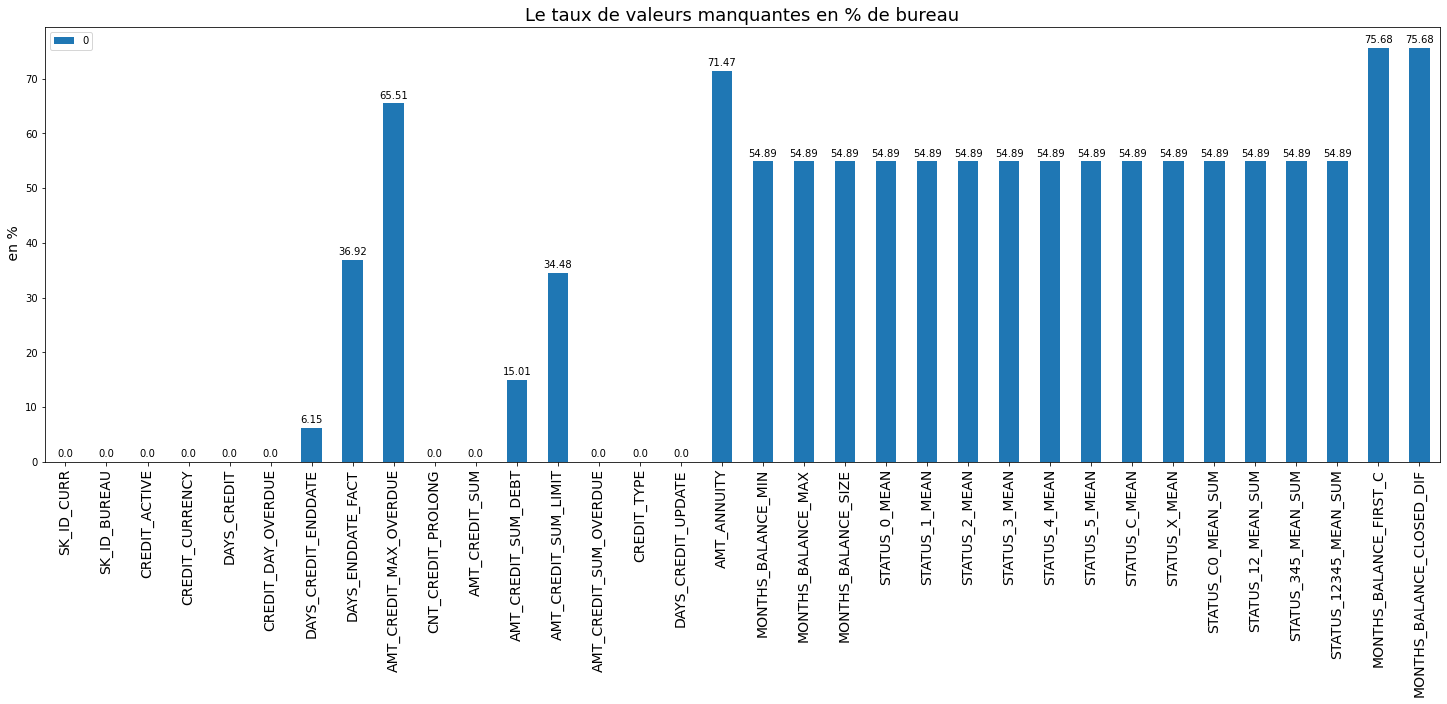

In [23]:
missing_rate = (bureau.isna().sum()/bureau.shape[0])*100
missing_rate

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(25,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='90', fontsize=14)
plt.title("Le taux de valeurs manquantes en % de bureau",fontsize=18)
# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

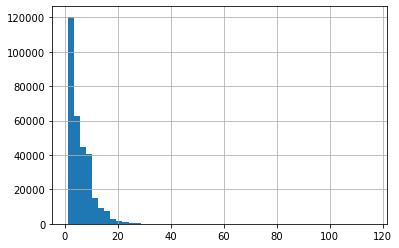

median      4.000000
max       116.000000
std         4.430354
mean        5.612709
min         1.000000
Name: SK_ID_BUREAU, dtype: float64

In [24]:
# How many loans of each customer are there to from Credit Bureau?
bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().hist(bins=50), plt.show()
bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().agg({"min", "max", "mean", "median", "std"})

In [25]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


Manipulation de données de bureau

In [26]:
# FEATURE ENGINEERING FOR BUREAU

# Categorical Variables
# -----------------------------------------------------------
# Useless
# bureau.drop("CREDIT_CURRENCY", axis = 1, inplace = True)

# Rare Categories
bureau["CREDIT_ACTIVE"] = np.where(bureau.CREDIT_ACTIVE.isin(["Sold", "Bad debt"]), "Sold_BadDebt", bureau.CREDIT_ACTIVE)

bureau["CREDIT_TYPE"] = np.where(
    ~bureau.CREDIT_TYPE.isin(
        ["Consumer credit", "Credit card", "Car loan", "Mortgage", "Microloan"]
    ), "Other", bureau["CREDIT_TYPE"])

# One-Hot Encoder
bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category=False)


# Numerical Variables
# -----------------------------------------------------------

# Bureau and bureau_balance numeric features
cal = ['min', 'max', 'mean', 'sum', 'median','std']
cols1 = [
    'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_CREDIT_UPDATE','CREDIT_DAY_OVERDUE',
    'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_OVERDUE',
    'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY', 'CNT_CREDIT_PROLONG', 'MONTHS_BALANCE_MIN',
    'MONTHS_BALANCE_MAX', 'MONTHS_BALANCE_SIZE', 'MONTHS_BALANCE_FIRST_C', 'MONTHS_BALANCE_CLOSED_DIF'
]

num_aggregations = {}


for i in cols1:
    num_aggregations[i] = cal
    
    
# Bureau and bureau_balance categorical features
cat_aggregations = {}

for i in bureau_cat:
    cat_aggregations[i] = ['mean']

cols2 = ['STATUS_0_MEAN', 'STATUS_1_MEAN', 'STATUS_2_MEAN', 'STATUS_3_MEAN', 'STATUS_4_MEAN',
        'STATUS_5_MEAN', 'STATUS_C_MEAN', 'STATUS_X_MEAN', 'STATUS_C0_MEAN_SUM',
        'STATUS_12_MEAN_SUM', 'STATUS_345_MEAN_SUM', 'STATUS_12345_MEAN_SUM']
for i in cols2:
    cat_aggregations[i] = ['mean', 'median', 'sum', 'max', 'std']

# del i, cols1, cols2, bureau_cat, cal
    
# Create aggregated data
bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
bureau_agg.columns = pd.Index(['BUREAU_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])


# New features
bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().value_counts()
bcount = bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().reset_index().rename({"SK_ID_BUREAU":"BUREAU_COUNT"}, axis = 1)
bcount["BUREAU_COUNT_CAT"] = np.where(bcount.BUREAU_COUNT < 4, 0, 1)
bcount["BUREAU_COUNT_CAT"] = np.where((bcount.BUREAU_COUNT >= 8) & (bcount.BUREAU_COUNT < 13), 2, bcount["BUREAU_COUNT_CAT"])
bcount["BUREAU_COUNT_CAT"] = np.where((bcount.BUREAU_COUNT >= 13) & (bcount.BUREAU_COUNT < 20), 3, bcount["BUREAU_COUNT_CAT"])
bcount["BUREAU_COUNT_CAT"] = np.where((bcount.BUREAU_COUNT >= 20), 4, bcount["BUREAU_COUNT_CAT"])
bureau_agg = pd.merge(bureau_agg, bcount, how = "left", on = "SK_ID_CURR")
# del bcount


# Bureau: Active credits - using only numerical aggregations
active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
bureau_agg = pd.merge(bureau_agg, active_agg, how='left', on='SK_ID_CURR')
# del active, active_agg


# Bureau: Closed credits - using only numerical aggregations
closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
bureau_agg = pd.merge(bureau_agg, closed_agg, how='left', on='SK_ID_CURR')
# del closed, closed_agg

# Bureau: Sold and Bad Debt credits - using only numerical aggregations
sold_baddebt = bureau[bureau['CREDIT_ACTIVE_Sold_BadDebt'] == 1]
sold_baddebt_agg = sold_baddebt.groupby('SK_ID_CURR').agg(num_aggregations)
sold_baddebt_agg.columns = pd.Index(['SOLD_BADDEBT' + e[0] + "_" + e[1].upper() for e in sold_baddebt_agg.columns.tolist()])
bureau_agg = pd.merge(bureau_agg, sold_baddebt_agg, how='left', on='SK_ID_CURR')
# del sold_baddebt, sold_baddebt_agg, bureau

# del num_aggregations, cat_aggregations


# WRITE FEATHER
# bureau_agg.to_feather("bureau_bureaubalance_agg_feather")
#pd.read_feather("./bureau_bureaubalance_agg_feather")

print("BUREAU & BURAU BALANCE SHAPE:", bureau_agg.shape, "\n")

bureau_agg.head()

BUREAU & BURAU BALANCE SHAPE: (305811, 460) 



,SK_ID_CURR,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_DAYS_CREDIT_SUM,BUREAU_DAYS_CREDIT_MEDIAN,BUREAU_DAYS_CREDIT_STD,BUREAU_DAYS_CREDIT_ENDDATE_MIN,BUREAU_DAYS_CREDIT_ENDDATE_MAX,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_SUM,BUREAU_DAYS_CREDIT_ENDDATE_MEDIAN,BUREAU_DAYS_CREDIT_ENDDATE_STD,BUREAU_DAYS_CREDIT_UPDATE_MIN,BUREAU_DAYS_CREDIT_UPDATE_MAX,BUREAU_DAYS_CREDIT_UPDATE_MEAN,BUREAU_DAYS_CREDIT_UPDATE_SUM,BUREAU_DAYS_CREDIT_UPDATE_MEDIAN,BUREAU_DAYS_CREDIT_UPDATE_STD,BUREAU_CREDIT_DAY_OVERDUE_MIN,BUREAU_CREDIT_DAY_OVERDUE_MAX,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_CREDIT_DAY_OVERDUE_SUM,BUREAU_CREDIT_DAY_OVERDUE_MEDIAN,BUREAU_CREDIT_DAY_OVERDUE_STD,BUREAU_AMT_CREDIT_MAX_OVERDUE_MIN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MAX,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_SUM,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEDIAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_STD,BUREAU_AMT_CREDIT_SUM_MIN,BUREAU_AMT_CREDIT_SUM_MAX,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_SUM,BUREAU_AMT_CREDIT_SUM_MEDIAN,BUREAU_AMT_CREDIT_SUM_STD,BUREAU_AMT_CREDIT_SUM_DEBT_MIN,BUREAU_AMT_CREDIT_SUM_DEBT_MAX,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_SUM,BUREAU_AMT_CREDIT_SUM_DEBT_MEDIAN,BUREAU_AMT_CREDIT_SUM_DEBT_STD,BUREAU_AMT_CREDIT_SUM_OVERDUE_MIN,BUREAU_AMT_CREDIT_SUM_OVERDUE_MAX,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEDIAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_STD,BUREAU_AMT_CREDIT_SUM_LIMIT_MIN,BUREAU_AMT_CREDIT_SUM_LIMIT_MAX,BUREAU_AMT_CREDIT_SUM_LIMIT_MEAN,BUREAU_AMT_CREDIT_SUM_LIMIT_SUM,BUREAU_AMT_CREDIT_SUM_LIMIT_MEDIAN,BUREAU_AMT_CREDIT_SUM_LIMIT_STD,BUREAU_AMT_ANNUITY_MIN,BUREAU_AMT_ANNUITY_MAX,BUREAU_AMT_ANNUITY_MEAN,BUREAU_AMT_ANNUITY_SUM,BUREAU_AMT_ANNUITY_MEDIAN,BUREAU_AMT_ANNUITY_STD,BUREAU_CNT_CREDIT_PROLONG_MIN,BUREAU_CNT_CREDIT_PROLONG_MAX,BUREAU_CNT_CREDIT_PROLONG_MEAN,BUREAU_CNT_CREDIT_PROLONG_SUM,BUREAU_CNT_CREDIT_PROLONG_MEDIAN,BUREAU_CNT_CREDIT_PROLONG_STD,BUREAU_MONTHS_BALANCE_MIN_MIN,BUREAU_MONTHS_BALANCE_MIN_MAX,BUREAU_MONTHS_BALANCE_MIN_MEAN,BUREAU_MONTHS_BALANCE_MIN_SUM,BUREAU_MONTHS_BALANCE_MIN_MEDIAN,BUREAU_MONTHS_BALANCE_MIN_STD,BUREAU_MONTHS_BALANCE_MAX_MIN,BUREAU_MONTHS_BALANCE_MAX_MAX,BUREAU_MONTHS_BALANCE_MAX_MEAN,BUREAU_MONTHS_BALANCE_MAX_SUM,BUREAU_MONTHS_BALANCE_MAX_MEDIAN,BUREAU_MONTHS_BALANCE_MAX_STD,BUREAU_MONTHS_BALANCE_SIZE_MIN,BUREAU_MONTHS_BALANCE_SIZE_MAX,BUREAU_MONTHS_BALANCE_SIZE_MEAN,BUREAU_MONTHS_BALANCE_SIZE_SUM,BUREAU_MONTHS_BALANCE_SIZE_MEDIAN,BUREAU_MONTHS_BALANCE_SIZE_STD,BUREAU_MONTHS_BALANCE_FIRST_C_MIN,BUREAU_MONTHS_BALANCE_FIRST_C_MAX,BUREAU_MONTHS_BALANCE_FIRST_C_MEAN,BUREAU_MONTHS_BALANCE_FIRST_C_SUM,BUREAU_MONTHS_BALANCE_FIRST_C_MEDIAN,BUREAU_MONTHS_BALANCE_FIRST_C_STD,BUREAU_MONTHS_BALANCE_CLOSED_DIF_MIN,BUREAU_MONTHS_BALANCE_CLOSED_DIF_MAX,BUREAU_MONTHS_BALANCE_CLOSED_DIF_MEAN,BUREAU_MONTHS_BALANCE_CLOSED_DIF_SUM,BUREAU_MONTHS_BALANCE_CLOSED_DIF_MEDIAN,BUREAU_MONTHS_BALANCE_CLOSED_DIF_STD,BUREAU_CREDIT_ACTIVE_Active_MEAN,BUREAU_CREDIT_ACTIVE_Closed_MEAN,BUREAU_CREDIT_ACTIVE_Sold_BadDebt_MEAN,BUREAU_CREDIT_CURRENCY_currency 1_MEAN,BUREAU_CREDIT_CURRENCY_currency 2_MEAN,BUREAU_CREDIT_CURRENCY_currency 3_MEAN,BUREAU_CREDIT_CURRENCY_currency 4_MEAN,BUREAU_CREDIT_TYPE_Car loan_MEAN,BUREAU_CREDIT_TYPE_Consumer credit_MEAN,BUREAU_CREDIT_TYPE_Credit card_MEAN,BUREAU_CREDIT_TYPE_Microloan_MEAN,BUREAU_CREDIT_TYPE_Mortgage_MEAN,BUREAU_CREDIT_TYPE_Other_MEAN,BUREAU_STATUS_0_MEAN_MEAN,BUREAU_STATUS_0_MEAN_MEDIAN,BUREAU_STATUS_0_MEAN_SUM,BUREAU_STATUS_0_MEAN_MAX,BUREAU_STATUS_0_MEAN_STD,BUREAU_STATUS_1_MEAN_MEAN,BUREAU_STATUS_1_MEAN_MEDIAN,BUREAU_STATUS_1_MEAN_SUM,BUREAU_STATUS_1_MEAN_MAX,BUREAU_STATUS_1_MEAN_STD,BUREAU_STATUS_2_MEAN_MEAN,BUREAU_STATUS_2_MEAN_MEDIAN,BUREAU_STATUS_2_MEAN_SUM,BUREAU_STATUS_2_MEAN_MAX,BUREAU_STATUS_2_MEAN_STD,BUREAU_STATUS_3_MEAN_MEAN,BUREAU_STATUS_3_MEAN_MEDIAN,BUREAU_STATUS_3_MEAN_SUM,BUREAU_STATUS_3_MEAN_MAX,BUREAU_STATUS_3_MEAN_STD,BUREAU_STATUS_4_MEAN_MEAN

## POS CASH balance

Le taux de valeurs manquantes en %

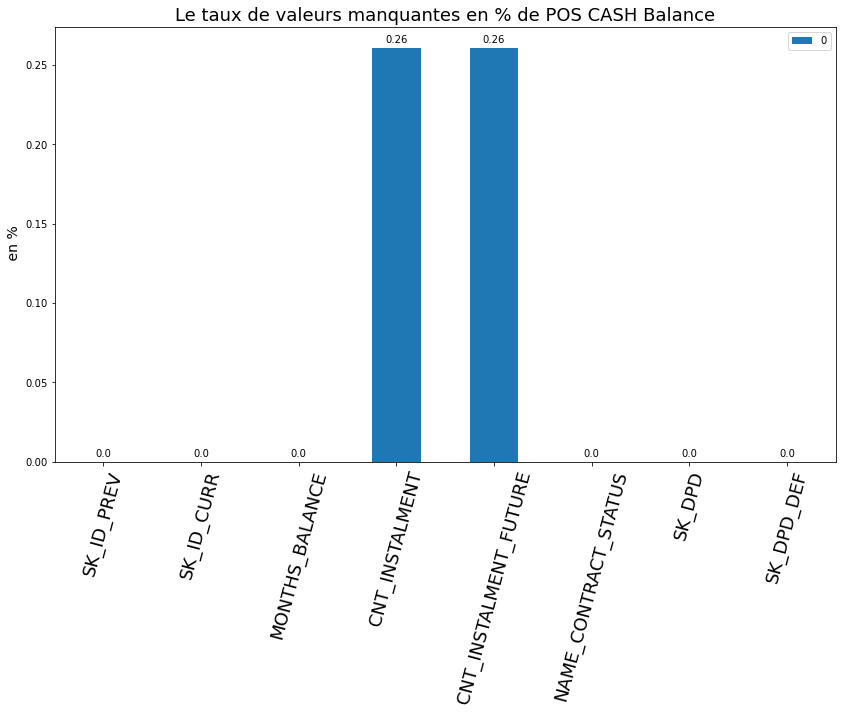

In [27]:
missing_rate = (df_POS_CASH_balance.isna().sum()/df_POS_CASH_balance.shape[0])*100
missing_rate

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(14,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='75', fontsize=18)
plt.title("Le taux de valeurs manquantes en % de POS CASH Balance",fontsize=18)
# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

In [28]:
df_POS_CASH_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


Nettoyage de données de df_POS_CASH_balance

In [29]:
# Rare
df_POS_CASH_balance["NAME_CONTRACT_STATUS"] = np.where(~(df_POS_CASH_balance["NAME_CONTRACT_STATUS"].isin([
   "Active", "Completed"
])), "Rare", df_POS_CASH_balance["NAME_CONTRACT_STATUS"])

# One-Hot Encoder
df_POS_CASH_balance, cat_cols = one_hot_encoder(df_POS_CASH_balance, nan_as_category=False)

aggregations = {
    # Numerical
    'MONTHS_BALANCE': ['max', 'mean', 'size'],
    'CNT_INSTALMENT': ['max', 'mean', 'std', 'min', 'median'],
    'CNT_INSTALMENT_FUTURE': ['max', 'mean', 'sum', 'min', 'median', 'std'],
    'SK_DPD': ['max', 'mean'],
    'SK_DPD_DEF': ['max', 'mean']
}
# Categorical
for cat in cat_cols:
    aggregations[cat] = ['mean']

# Aggregation
df_POS_CASH_balance_agg = df_POS_CASH_balance.groupby('SK_ID_CURR').agg(aggregations)
df_POS_CASH_balance_agg.columns = pd.Index(['df_POS_CASH_balance_' + e[0] + "_" + e[1].upper() for e in df_POS_CASH_balance_agg.columns.tolist()])
# Count df_POS_CASH_balance cash accounts
df_POS_CASH_balance_agg['df_POS_CASH_balance_COUNT'] = df_POS_CASH_balance.groupby('SK_ID_CURR').size()
df_POS_CASH_balance_agg.reset_index(inplace = True)
del df_POS_CASH_balance

print("df_POS_CASH_balance CASH BALANCE SHAPE:", df_POS_CASH_balance_agg.shape, "\n")

df_POS_CASH_balance_agg.head()

df_POS_CASH_balance CASH BALANCE SHAPE: (337252, 23) 



,SK_ID_CURR,df_POS_CASH_balance_MONTHS_BALANCE_MAX,df_POS_CASH_balance_MONTHS_BALANCE_MEAN,df_POS_CASH_balance_MONTHS_BALANCE_SIZE,df_POS_CASH_balance_CNT_INSTALMENT_MAX,df_POS_CASH_balance_CNT_INSTALMENT_MEAN,df_POS_CASH_balance_CNT_INSTALMENT_STD,df_POS_CASH_balance_CNT_INSTALMENT_MIN,df_POS_CASH_balance_CNT_INSTALMENT_MEDIAN,df_POS_CASH_balance_CNT_INSTALMENT_FUTURE_MAX,df_POS_CASH_balance_CNT_INSTALMENT_FUTURE_MEAN,df_POS_CASH_balance_CNT_INSTALMENT_FUTURE_SUM,df_POS_CASH_balance_CNT_INSTALMENT_FUTURE_MIN,df_POS_CASH_balance_CNT_INSTALMENT_FUTURE_MEDIAN,df_POS_CASH_balance_CNT_INSTALMENT_FUTURE_STD,df_POS_CASH_balance_SK_DPD_MAX,df_POS_CASH_balance_SK_DPD_MEAN,df_POS_CASH_balance_SK_DPD_DEF_MAX,df_POS_CASH_balance_SK_DPD_DEF_MEAN,df_POS_CASH_balance_NAME_CONTRACT_STATUS_Active_MEAN,df_POS_CASH_balance_NAME_CONTRACT_STATUS_Completed_MEAN,df_POS_CASH_balance_NAME_CONTRACT_STATUS_Rare_MEAN,df_POS_CASH_balance_COUNT
0,100001,-53,-72.555556,9,4.0,4.000000,0.000000,4.0,4.0,4.0,1.444444,13.0,0.0,1.0,1.424001,7,0.777778,7,0.777778,0.777778,0.222222,0.000000,9
1,100002,-1,-10.000000,19,24.0,24.000000,0.000000,24.0,24.0,24.0,15.000000,285.0,6.0,15.0,5.627314,0,0.000000,0,0.000000,1.000000,0.000000,0.000000,19
2,100003,-18,-43.785714,28,12.0,10.107143,2.806597,6.0,12.0,12.0,5.785714,162.0,0.0,6.0,3.842811,0,0.000000,0,0.000000,0.928571,0.071429,0.000000,28
3,100004,-24,-25.500000,4,4.0,3.750000,0.500000,3.0,4.0,4.0,2.250000,9.0,0.0,2.5,1.707825,0,0.000000,0,0.000000,0.750000,0.250000,0.000000,4
4,100005,-15,-20.000000,11,12.0,11.700000,0.948683,9.0,12.0,12.0,7.200000,72.0,0.0,7.5,3.614784,0,0.000000,0,0.000000,0.818182,0.090909,0.090909,11


## Credit Card Balance

Aperçus mensuels du solde des cartes de crédit précédentes que le demandeur a avec Home Credit.
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) liés aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon # de cartes de crédit précédentes relatives # de mois où nous avons un historique observable pour les lignes de carte de crédit précédentes).

Le taux de valeurs manquantes en % df_credit_card_balance

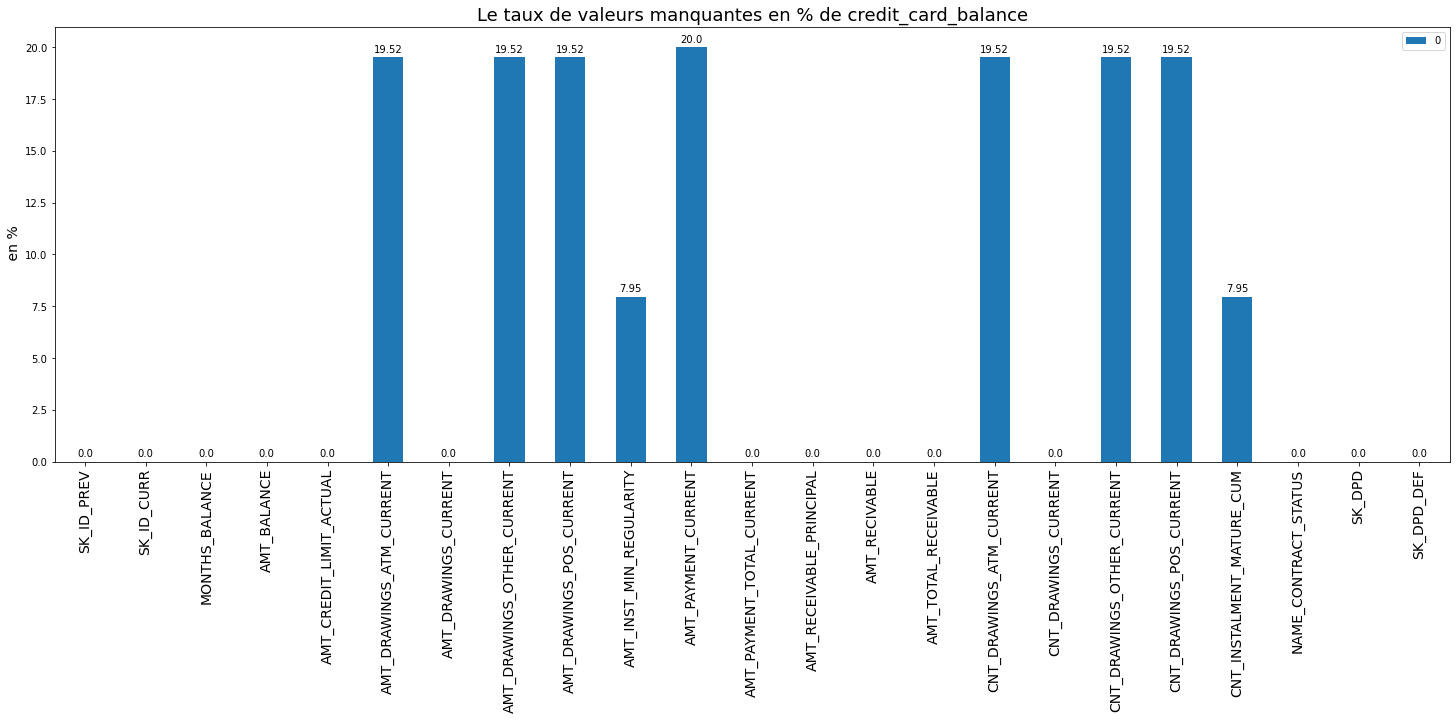

In [30]:
missing_rate = (df_credit_card_balance.isna().sum()/df_credit_card_balance.shape[0])*100

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(25,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='90', fontsize=14)
plt.title("Le taux de valeurs manquantes en % de credit_card_balance",fontsize=18)

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

Nettoyage des données df_credit_card_balance

In [31]:
# Rare
df_credit_card_balance["NAME_CONTRACT_STATUS"] = np.where(~(df_credit_card_balance["NAME_CONTRACT_STATUS"].isin([
   "Active", "Completed"
])), "Rare", df_credit_card_balance["NAME_CONTRACT_STATUS"])

# One Hot Encoder
df_credit_card_balance, cat_cols = one_hot_encoder(df_credit_card_balance, nan_as_category=False)

# General aggregations
df_credit_card_balance.drop(['SK_ID_PREV'], axis=1, inplace=True)
df_credit_card_balance_agg = df_credit_card_balance.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'std'])
df_credit_card_balance_agg.columns = pd.Index(['df_credit_card_balance_' + e[0] + "_" + e[1].upper() for e in df_credit_card_balance_agg.columns.tolist()])
# Count credit card lines
df_credit_card_balance_agg['df_credit_card_balance_COUNT'] = df_credit_card_balance.groupby('SK_ID_CURR').size()
df_credit_card_balance_agg.reset_index(inplace = True)
del df_credit_card_balance

print("CREDIT CARD BALANCE SHAPE:", df_credit_card_balance_agg.shape, "\n")

df_credit_card_balance_agg.head()

CREDIT CARD BALANCE SHAPE: (103558, 117) 



,SK_ID_CURR,df_credit_card_balance_MONTHS_BALANCE_MIN,df_credit_card_balance_MONTHS_BALANCE_MAX,df_credit_card_balance_MONTHS_BALANCE_MEAN,df_credit_card_balance_MONTHS_BALANCE_SUM,df_credit_card_balance_MONTHS_BALANCE_STD,df_credit_card_balance_AMT_BALANCE_MIN,df_credit_card_balance_AMT_BALANCE_MAX,df_credit_card_balance_AMT_BALANCE_MEAN,df_credit_card_balance_AMT_BALANCE_SUM,df_credit_card_balance_AMT_BALANCE_STD,df_credit_card_balance_AMT_CREDIT_LIMIT_ACTUAL_MIN,df_credit_card_balance_AMT_CREDIT_LIMIT_ACTUAL_MAX,df_credit_card_balance_AMT_CREDIT_LIMIT_ACTUAL_MEAN,df_credit_card_balance_AMT_CREDIT_LIMIT_ACTUAL_SUM,df_credit_card_balance_AMT_CREDIT_LIMIT_ACTUAL_STD,df_credit_card_balance_AMT_DRAWINGS_ATM_CURRENT_MIN,df_credit_card_balance_AMT_DRAWINGS_ATM_CURRENT_MAX,df_credit_card_balance_AMT_DRAWINGS_ATM_CURRENT_MEAN,df_credit_card_balance_AMT_DRAWINGS_ATM_CURRENT_SUM,df_credit_card_balance_AMT_DRAWINGS_ATM_CURRENT_STD,df_credit_card_balance_AMT_DRAWINGS_CURRENT_MIN,df_credit_card_balance_AMT_DRAWINGS_CURRENT_MAX,df_credit_card_balance_AMT_DRAWINGS_CURRENT_MEAN,df_credit_card_balance_AMT_DRAWINGS_CURRENT_SUM,df_credit_card_balance_AMT_DRAWINGS_CURRENT_STD,df_credit_card_balance_AMT_DRAWINGS_OTHER_CURRENT_MIN,df_credit_card_balance_AMT_DRAWINGS_OTHER_CURRENT_MAX,df_credit_card_balance_AMT_DRAWINGS_OTHER_CURRENT_MEAN,df_credit_card_balance_AMT_DRAWINGS_OTHER_CURRENT_SUM,df_credit_card_balance_AMT_DRAWINGS_OTHER_CURRENT_STD,df_credit_card_balance_AMT_DRAWINGS_POS_CURRENT_MIN,df_credit_card_balance_AMT_DRAWINGS_POS_CURRENT_MAX,df_credit_card_balance_AMT_DRAWINGS_POS_CURRENT_MEAN,df_credit_card_balance_AMT_DRAWINGS_POS_CURRENT_SUM,df_credit_card_balance_AMT_DRAWINGS_POS_CURRENT_STD,df_credit_card_balance_AMT_INST_MIN_REGULARITY_MIN,df_credit_card_balance_AMT_INST_MIN_REGULARITY_MAX,df_credit_card_balance_AMT_INST_MIN_REGULARITY_MEAN,df_credit_card_balance_AMT_INST_MIN_REGULARITY_SUM,df_credit_card_balance_AMT_INST_MIN_REGULARITY_STD,df_credit_card_balance_AMT_PAYMENT_CURRENT_MIN,df_credit_card_balance_AMT_PAYMENT_CURRENT_MAX,df_credit_card_balance_AMT_PAYMENT_CURRENT_MEAN,df_credit_card_balance_AMT_PAYMENT_CURRENT_SUM,df_credit_card_balance_AMT_PAYMENT_CURRENT_STD,df_credit_card_balance_AMT_PAYMENT_TOTAL_CURRENT_MIN,df_credit_card_balance_AMT_PAYMENT_TOTAL_CURRENT_MAX,df_credit_card_balance_AMT_PAYMENT_TOTAL_CURRENT_MEAN,df_credit_card_balance_AMT_PAYMENT_TOTAL_CURRENT_SUM,df_credit_card_balance_AMT_PAYMENT_TOTAL_CURRENT_STD,df_credit_card_balance_AMT_RECEIVABLE_PRINCIPAL_MIN,df_credit_card_balance_AMT_RECEIVABLE_PRINCIPAL_MAX,df_credit_card_balance_AMT_RECEIVABLE_PRINCIPAL_MEAN,df_credit_card_balance_AMT_RECEIVABLE_PRINCIPAL_SUM,df_credit_card_balance_AMT_RECEIVABLE_PRINCIPAL_STD,df_credit_card_balance_AMT_RECIVABLE_MIN,df_credit_card_balance_AMT_RECIVABLE_MAX,df_credit_card_balance_AMT_RECIVABLE_MEAN,df_credit_card_balance_AMT_RECIVABLE_SUM,df_credit_card_balance_AMT_RECIVABLE_STD,df_credit_card_balance_AMT_TOTAL_RECEIVABLE_MIN,df_credit_card_balance_AMT_TOTAL_RECEIVABLE_MAX,df_credit_card_balance_AMT_TOTAL_RECEIVABLE_MEAN,df_credit_card_balance_AMT_TOTAL_RECEIVABLE_SUM,df_credit_card_balance_AMT_TOTAL_RECEIVABLE_STD,df_credit_card_balance_CNT_DRAWINGS_ATM_CURRENT_MIN,df_credit_card_balance_CNT_DRAWINGS_ATM_CURRENT_MAX,df_credit_card_balance_CNT_DRAWINGS_ATM_CURRENT_MEAN,df_credit_card_balance_CNT_DRAWINGS_ATM_CURRENT_SUM,df_credit_card_balance_CNT_DRAWINGS_ATM_CURRENT_STD,df_credit_card_balance_CNT_DRAWINGS_CURRENT_MIN,df_credit_card_balance_CNT_DRAWINGS_CURRENT_MAX,df_credit_card_balance_CNT_DRAWINGS_CURRENT_MEAN,df_credit_card_balance_CNT_DRAWINGS_CURRENT_SUM,df_credit_card_balance_CNT_DRAWINGS_CURRENT_STD,df_credit_card_balance_CNT_DRAWINGS_OTHER_CURRENT_MIN,df_credit_card_balance_CNT_DRAWINGS_OTHER_CURRENT_MAX,df_credit_card_balance_CNT_DRAWINGS_OTHER_CURRENT_MEAN,df_credit_card_balance_CNT_DRAWINGS_OTHER_CURRENT_SUM,df_credit_card_balance_CNT_DRAWINGS_OTHER_CURRENT_STD,df_credit_card_balance_CNT_DRAWINGS_POS_CURRENT_MIN,

## Installments Payments

Historique de remboursement des crédits précédemment décaissés en Home Credit liés aux prêts de notre échantillon. Il y a :

-  une ligne pour chaque paiement effectué plus 
-  une ligne pour chaque paiement manqué. Une ligne équivaut à un versement d'une échéance ou une échéance correspondant à un versement d'un précédent crédit immobilier lié aux crédits de notre échantillon.

Le taux de valeurs manquantes en % df_credit_card_balance

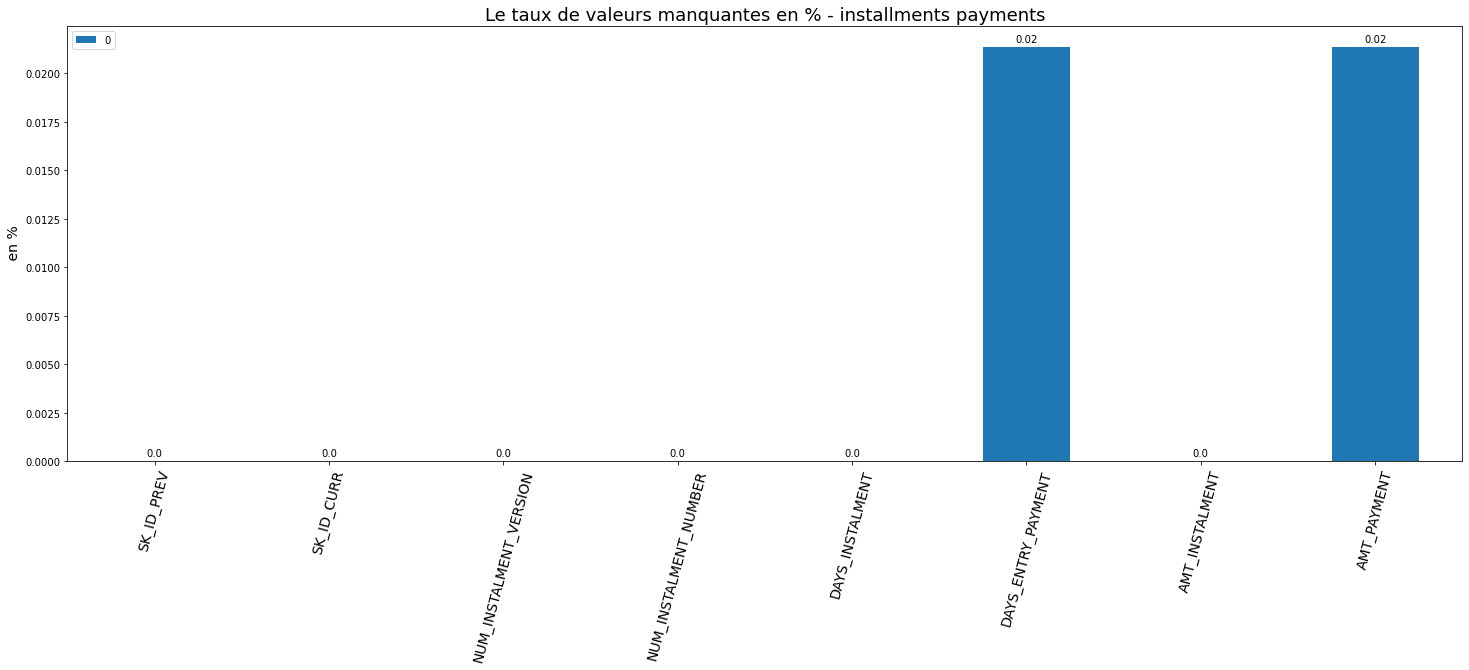

In [32]:
missing_rate = (df_installments_payments.isna().sum()/df_installments_payments.shape[0])*100

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(25,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='75', fontsize=14)
plt.title("Le taux de valeurs manquantes en % - installments payments",fontsize=18)

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

In [33]:
# Percentage and difference paid in each installment (amount paid and installment value)
df_installments_payments['PAYMENT_PERC'] = df_installments_payments['AMT_PAYMENT'] / df_installments_payments['AMT_INSTALMENT']
df_installments_payments['PAYMENT_DIFF'] = df_installments_payments['AMT_INSTALMENT'] - df_installments_payments['AMT_PAYMENT']
# Days past due and days before due (no negative values)
df_installments_payments['DPD'] = df_installments_payments['DAYS_ENTRY_PAYMENT'] - df_installments_payments['DAYS_INSTALMENT']
df_installments_payments['DBD'] = df_installments_payments['DAYS_INSTALMENT'] - df_installments_payments['DAYS_ENTRY_PAYMENT']
df_installments_payments['DPD'] = df_installments_payments['DPD'].apply(lambda x: x if x > 0 else 0)
df_installments_payments['DBD'] = df_installments_payments['DBD'].apply(lambda x: x if x > 0 else 0)
# Features: Perform aggregations
aggregations = {
    'NUM_INSTALMENT_VERSION': ['nunique'],
    'NUM_INSTALMENT_NUMBER': ['max', 'mean', 'sum', 'median', 'std'],
    'DAYS_INSTALMENT': ['max', 'mean', 'sum', 'median', 'std'],
    'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum', 'median', 'std'],
    'AMT_INSTALMENT': ['max', 'mean', 'sum', 'median', 'std'],
    'AMT_PAYMENT': ['min', 'max', 'mean', 'sum', 'median', 'std'],
    'DPD': ['max', 'mean', 'sum', 'median', 'std'],
    'DBD': ['max', 'mean', 'sum', 'median', 'std'],
    'PAYMENT_PERC': ['max', 'mean', 'sum', 'std', 'median'],
    'PAYMENT_DIFF': ['max', 'mean', 'sum', 'std', 'median']
}

df_installments_payments_agg = df_installments_payments.groupby('SK_ID_CURR').agg(aggregations)
df_installments_payments_agg.columns = pd.Index(['INS_' + e[0] + "_" + e[1].upper() for e in df_installments_payments_agg.columns.tolist()])
# Count installments accounts
df_installments_payments_agg['INS_COUNT'] = df_installments_payments.groupby('SK_ID_CURR').size()

df_installments_payments_agg.reset_index(inplace = True)
del df_installments_payments



print("INSTALLMENTS PAYMENTS SHAPE:", df_installments_payments_agg.shape, "\n")

df_installments_payments_agg.head()

INSTALLMENTS PAYMENTS SHAPE: (339587, 49) 



,SK_ID_CURR,INS_NUM_INSTALMENT_VERSION_NUNIQUE,INS_NUM_INSTALMENT_NUMBER_MAX,INS_NUM_INSTALMENT_NUMBER_MEAN,INS_NUM_INSTALMENT_NUMBER_SUM,INS_NUM_INSTALMENT_NUMBER_MEDIAN,INS_NUM_INSTALMENT_NUMBER_STD,INS_DAYS_INSTALMENT_MAX,INS_DAYS_INSTALMENT_MEAN,INS_DAYS_INSTALMENT_SUM,INS_DAYS_INSTALMENT_MEDIAN,INS_DAYS_INSTALMENT_STD,INS_DAYS_ENTRY_PAYMENT_MAX,INS_DAYS_ENTRY_PAYMENT_MEAN,INS_DAYS_ENTRY_PAYMENT_SUM,INS_DAYS_ENTRY_PAYMENT_MEDIAN,INS_DAYS_ENTRY_PAYMENT_STD,INS_AMT_INSTALMENT_MAX,INS_AMT_INSTALMENT_MEAN,INS_AMT_INSTALMENT_SUM,INS_AMT_INSTALMENT_MEDIAN,INS_AMT_INSTALMENT_STD,INS_AMT_PAYMENT_MIN,INS_AMT_PAYMENT_MAX,INS_AMT_PAYMENT_MEAN,INS_AMT_PAYMENT_SUM,INS_AMT_PAYMENT_MEDIAN,INS_AMT_PAYMENT_STD,INS_DPD_MAX,INS_DPD_MEAN,INS_DPD_SUM,INS_DPD_MEDIAN,INS_DPD_STD,INS_DBD_MAX,INS_DBD_MEAN,INS_DBD_SUM,INS_DBD_MEDIAN,INS_DBD_STD,INS_PAYMENT_PERC_MAX,INS_PAYMENT_PERC_MEAN,INS_PAYMENT_PERC_SUM,INS_PAYMENT_PERC_STD,INS_PAYMENT_PERC_MEDIAN,INS_PAYMENT_DIFF_MAX,INS_PAYMENT_DIFF_MEAN,INS_PAYMENT_DIFF_SUM,INS_PAYMENT_DIFF_STD,INS_PAYMENT_DIFF_MEDIAN,INS_COUNT
0,100001,2,4,2.714286,19,3.0,1.112697,-1619.0,-2187.714286,-15314.0,-1709.0,653.989733,-1628.0,-2195.000000,-15365.0,-1715.0,643.904237,17397.900,5885.132143,41195.925,3980.925,5076.676624,3951.000,17397.900,5885.132143,41195.925,3980.925,5076.676624,11.0,1.571429,11.0,0.0,4.157609,36.0,8.857143,62.0,6.0,12.811825,1.0,1.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7
1,100002,2,19,10.000000,190,10.0,5.627314,-25.0,-295.000000,-5605.0,-295.0,168.819430,-49.0,-315.421053,-5993.0,-312.0,172.058877,53093.745,11559.247105,219625.695,9251.775,10058.037722,9251.775,53093.745,11559.247105,219625.695,9251.775,10058.037722,0.0,0.000000,0.0,0.0,0.000000,31.0,20.421053,388.0,19.0,4.925171,1.0,1.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19
2,100003,2,12,5.080000,127,5.0,3.134751,-536.0,-1378.160000,-34454.0,-797.0,757.453556,-544.0,-1385.320000,-34633.0,-806.0,757.325432,560835.360,64754.586000,1618864.650,64275.615,110542.592300,6662.970,560835.360,64754.586000,1618864.650,64275.615,110542.592300,0.0,0.000000,0.0,0.0,0.000000,14.0,7.160000,179.0,6.0,3.726929,1.0,1.0,25.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25
3,100004,2,3,2.000000,6,2.0,1.000000,-724.0,-754.000000,-2262.0,-754.0,30.000000,-727.0,-761.666667,-2285.0,-763.0,34.019602,10573.965,7096.155000,21288.465,5357.250,3011.871810,5357.250,10573.965,7096.155000,21288.465,5357.250,3011.871810,0.0,0.000000,0.0,0.0,0.000000,11.0,7.666667,23.0,9.0,4.163332,1.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
4,100005,2,9,5.000000,45,5.0,2.738613,-466.0,-586.000000,-5274.0,-586.0,82.158384,-470.0,-609.555556,-5486.0,-585.0,90.554005,17656.245,6240.205000,56161.845,4813.200,4281.015000,4813.200,17656.245,6240.205000,56161.845,4813.200,4281.015000,1.0,0.111111,1.0,0.0,0.333333,37.0,23.666667,213.0,29.0,13.285330,1.0,1.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9


In [34]:
df_installments_payments_agg.reset_index(drop=True)
df_installments_payments_agg.to_csv('df_installments_payments_agg.csv', index = False)

## Previous Applications

- Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon.
- Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.

Le taux de valeurs manquantes en % df_previous_application

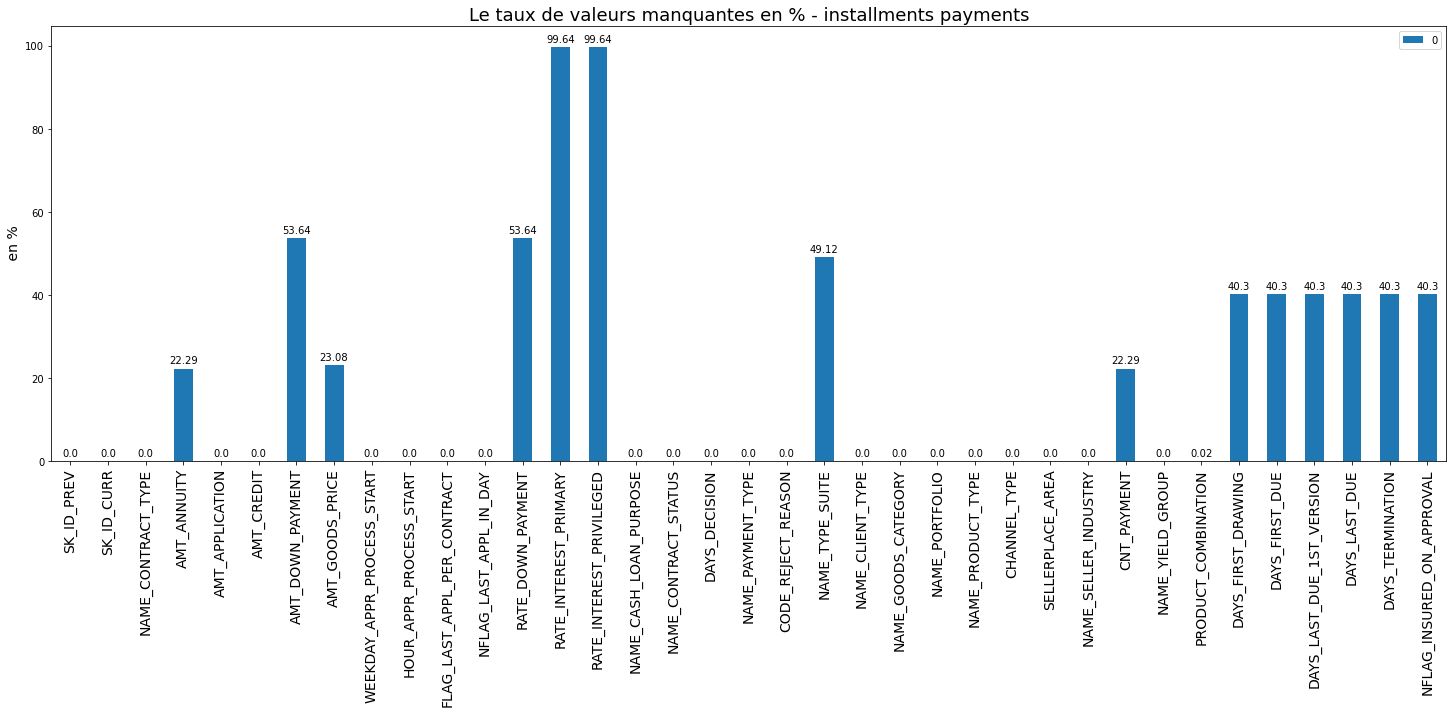

In [35]:
missing_rate = (df_previous_application.isna().sum()/df_previous_application.shape[0])*100

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(25,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='90', fontsize=14)
plt.title("Le taux de valeurs manquantes en % - installments payments",fontsize=18)

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

Nettoyage des données de df_previous_application

In [36]:
# Rare Encoder
def rare_encoder(data, col, rare_perc):
    temp = data[col].value_counts() / len(data) < rare_perc
    data[col] = np.where(~data[col].isin(temp[temp < rare_perc].index), "Rare", data[col])

In [37]:
# Rare Encoder
rare_cols = [
    "NAME_PAYMENT_TYPE", "CODE_REJECT_REASON", "CHANNEL_TYPE", "NAME_GOODS_CATEGORY",
    "NAME_SELLER_INDUSTRY", "NAME_TYPE_SUITE"
]

for i in rare_cols:
    rare_encoder(df_previous_application, i, rare_perc = 0.01)

df_previous_application["NAME_CASH_LOAN_PURPOSE"] = np.where(~df_previous_application["NAME_CASH_LOAN_PURPOSE"].isin(["XAP", "XNA"]), "Other", df_previous_application["NAME_CASH_LOAN_PURPOSE"])

rare_encoder(df_previous_application, "NAME_PORTFOLIO", rare_perc = 0.1) 

# Cash, Pos, Card
df_previous_application["PRODUCT_COMBINATION_CATS"] = np.where(df_previous_application["PRODUCT_COMBINATION"].str.contains("Cash"), "CASH", "POS")
df_previous_application["PRODUCT_COMBINATION_CATS"] = np.where(df_previous_application["PRODUCT_COMBINATION"].str.contains("Card"), "CARD", df_previous_application["PRODUCT_COMBINATION_CATS"])
# New categorical variables
df_previous_application["PRODUCT_COMBINATION_POS_WITH"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("without"))), "WITHOUT", "OTHER")
df_previous_application["PRODUCT_COMBINATION_POS_WITH"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("with interest"))), "WITH", df_previous_application["PRODUCT_COMBINATION_POS_WITH"])
df_previous_application["PRODUCT_COMBINATION_POS_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("household"))), "household", "OTHER")
df_previous_application["PRODUCT_COMBINATION_POS_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("industry"))), "industry", df_previous_application["PRODUCT_COMBINATION_POS_TYPE"])
df_previous_application["PRODUCT_COMBINATION_POS_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("mobile"))), "mobile", df_previous_application["PRODUCT_COMBINATION_POS_TYPE"])
df_previous_application["PRODUCT_COMBINATION_POS_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("other"))), "posother", df_previous_application["PRODUCT_COMBINATION_POS_TYPE"])
df_previous_application["PRODUCT_COMBINATION_CASH_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("Cash") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("X-Sell"))), "xsell", "OTHER")
df_previous_application["PRODUCT_COMBINATION_CASH_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("Cash") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("Street"))), "street", df_previous_application["PRODUCT_COMBINATION_CASH_TYPE"])


# Useless
df_previous_application.drop(["WEEKDAY_APPR_PROCESS_START", "FLAG_LAST_APPL_PER_CONTRACT", "NFLAG_LAST_APPL_IN_DAY", "NFLAG_LAST_APPL_IN_DAY"], axis = 1, inplace = True)

# One-Hot Encoder
df_previous_application, cat_cols = one_hot_encoder(df_previous_application, nan_as_category=True)


# Days 365.243 values -> nan
df_previous_application['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
df_previous_application['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
df_previous_application['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
df_previous_application['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
df_previous_application['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)

# Add feature: value ask / value received percentage
df_previous_application['APP_CREDIT_PERC'] = df_previous_application['AMT_APPLICATION'] / df_previous_application['AMT_CREDIT']


# Previous Applications numeric features
num_aggregations = {
    'AMT_ANNUITY': ['min', 'max', 'mean', "median", "std"],
    'AMT_APPLICATION': ['min', 'max', 'mean', "median", "std"],
    'AMT_CREDIT': ['min', 'max', 'mean', "median", "std"],
    'APP_CREDIT_PERC': ['min', 'max', 'mean', "median", "std"],
    'AMT_DOWN_PAYMENT': ['min', 'max', 'mean', "median", "std"],
    'AMT_GOODS_PRICE': ['min', 'max', 'mean', "median", "std"],
    'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean', "median", "std"],
    'RATE_DOWN_PAYMENT': ['min', 'max', 'mean', "std"],
    'RATE_INTEREST_PRIMARY': ['min', 'max', 'mean', "std"],
    'RATE_INTEREST_PRIVILEGED': ['min', 'max', 'mean', "std"],
    'DAYS_DECISION': ['min', 'max', 'mean', "median", "std"],
    'CNT_PAYMENT': ['mean', 'sum', "median", "std"],
    'SELLERPLACE_AREA': ['min', 'max', 'mean', "median", "std"],
    'DAYS_FIRST_DRAWING': ['min', 'max', 'mean', "median", "std"],
    'DAYS_FIRST_DUE': ['min', 'max', 'mean', "median", "std"],
    'DAYS_LAST_DUE_1ST_VERSION': ['min', 'max', 'mean', "median", "std"],
    'DAYS_LAST_DUE': ['min', 'max', 'mean', "median", "std"],
    'DAYS_TERMINATION': ['min', 'max', 'mean', "median", "std"],
    # Categorical
    "NFLAG_INSURED_ON_APPROVAL": ["mean"]
}
# Previous Applications categorical features
cat_aggregations = {}
for cat in cat_cols:
    cat_aggregations[cat] = ['mean']

df_previous_application_agg = df_previous_application.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
df_previous_application_agg.columns = pd.Index(['df_previous_application_' + e[0] + "_" + e[1].upper() for e in df_previous_application_agg.columns.tolist()])

# Previous Applications: Approved Applications - only numerical features
approved = df_previous_application[df_previous_application['NAME_CONTRACT_STATUS_Approved'] == 1]
approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
df_previous_application_agg = pd.merge(df_previous_application_agg,approved_agg, how='left', on='SK_ID_CURR')

# Previous Applications: Refused Applications - only numerical features
refused = df_previous_application[df_previous_application['NAME_CONTRACT_STATUS_Refused'] == 1]
refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
df_previous_application_agg = pd.merge(df_previous_application_agg, refused_agg, how='left', on='SK_ID_CURR')

del refused, refused_agg, approved, approved_agg
df_previous_application_agg.reset_index(inplace = True)


print("PREVIOUS APPLICATIONS SHAPE:", df_previous_application_agg.shape, "\n")

df_previous_application_agg.head()

C:\Users\sweet\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:121: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  return op.get_result()
C:\Users\sweet\AppData\Local\Temp/ipykernel_1608/25893285.py:90: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_previous_application_agg.reset_index(inplace = True)


PREVIOUS APPLICATIONS SHAPE: (338857, 378) 



,SK_ID_CURR,df_previous_application_AMT_ANNUITY_MIN,df_previous_application_AMT_ANNUITY_MAX,df_previous_application_AMT_ANNUITY_MEAN,df_previous_application_AMT_ANNUITY_MEDIAN,df_previous_application_AMT_ANNUITY_STD,df_previous_application_AMT_APPLICATION_MIN,df_previous_application_AMT_APPLICATION_MAX,df_previous_application_AMT_APPLICATION_MEAN,df_previous_application_AMT_APPLICATION_MEDIAN,df_previous_application_AMT_APPLICATION_STD,df_previous_application_AMT_CREDIT_MIN,df_previous_application_AMT_CREDIT_MAX,df_previous_application_AMT_CREDIT_MEAN,df_previous_application_AMT_CREDIT_MEDIAN,df_previous_application_AMT_CREDIT_STD,df_previous_application_APP_CREDIT_PERC_MIN,df_previous_application_APP_CREDIT_PERC_MAX,df_previous_application_APP_CREDIT_PERC_MEAN,df_previous_application_APP_CREDIT_PERC_MEDIAN,df_previous_application_APP_CREDIT_PERC_STD,df_previous_application_AMT_DOWN_PAYMENT_MIN,df_previous_application_AMT_DOWN_PAYMENT_MAX,df_previous_application_AMT_DOWN_PAYMENT_MEAN,df_previous_application_AMT_DOWN_PAYMENT_MEDIAN,df_previous_application_AMT_DOWN_PAYMENT_STD,df_previous_application_AMT_GOODS_PRICE_MIN,df_previous_application_AMT_GOODS_PRICE_MAX,df_previous_application_AMT_GOODS_PRICE_MEAN,df_previous_application_AMT_GOODS_PRICE_MEDIAN,df_previous_application_AMT_GOODS_PRICE_STD,df_previous_application_HOUR_APPR_PROCESS_START_MIN,df_previous_application_HOUR_APPR_PROCESS_START_MAX,df_previous_application_HOUR_APPR_PROCESS_START_MEAN,df_previous_application_HOUR_APPR_PROCESS_START_MEDIAN,df_previous_application_HOUR_APPR_PROCESS_START_STD,df_previous_application_RATE_DOWN_PAYMENT_MIN,df_previous_application_RATE_DOWN_PAYMENT_MAX,df_previous_application_RATE_DOWN_PAYMENT_MEAN,df_previous_application_RATE_DOWN_PAYMENT_STD,df_previous_application_RATE_INTEREST_PRIMARY_MIN,df_previous_application_RATE_INTEREST_PRIMARY_MAX,df_previous_application_RATE_INTEREST_PRIMARY_MEAN,df_previous_application_RATE_INTEREST_PRIMARY_STD,df_previous_application_RATE_INTEREST_PRIVILEGED_MIN,df_previous_application_RATE_INTEREST_PRIVILEGED_MAX,df_previous_application_RATE_INTEREST_PRIVILEGED_MEAN,df_previous_application_RATE_INTEREST_PRIVILEGED_STD,df_previous_application_DAYS_DECISION_MIN,df_previous_application_DAYS_DECISION_MAX,df_previous_application_DAYS_DECISION_MEAN,df_previous_application_DAYS_DECISION_MEDIAN,df_previous_application_DAYS_DECISION_STD,df_previous_application_CNT_PAYMENT_MEAN,df_previous_application_CNT_PAYMENT_SUM,df_previous_application_CNT_PAYMENT_MEDIAN,df_previous_application_CNT_PAYMENT_STD,df_previous_application_SELLERPLACE_AREA_MIN,df_previous_application_SELLERPLACE_AREA_MAX,df_previous_application_SELLERPLACE_AREA_MEAN,df_previous_application_SELLERPLACE_AREA_MEDIAN,df_previous_application_SELLERPLACE_AREA_STD,df_previous_application_DAYS_FIRST_DRAWING_MIN,df_previous_application_DAYS_FIRST_DRAWING_MAX,df_previous_application_DAYS_FIRST_DRAWING_MEAN,df_previous_application_DAYS_FIRST_DRAWING_MEDIAN,df_previous_application_DAYS_FIRST_DRAWING_STD,df_previous_application_DAYS_FIRST_DUE_MIN,df_previous_application_DAYS_FIRST_DUE_MAX,df_previous_application_DAYS_FIRST_DUE_MEAN,df_previous_application_DAYS_FIRST_DUE_MEDIAN,df_previous_application_DAYS_FIRST_DUE_STD,df_previous_application_DAYS_LAST_DUE_1ST_VERSION_MIN,df_previous_application_DAYS_LAST_DUE_1ST_VERSION_MAX,df_previous_application_DAYS_LAST_DUE_1ST_VERSION_MEAN,df_previous_application_DAYS_LAST_DUE_1ST_VERSION_MEDIAN,df_previous_application_DAYS_LAST_DUE_1ST_VERSION_STD,df_previous_application_DAYS_LAST_DUE_MIN,df_previous_application_DAYS_LAST_DUE_MAX,df_previous_application_DAYS_LAST_DUE_MEAN,df_previous_application_DAYS_LAST_DUE_MEDIAN,df_previous_application_DAYS_LAST_DUE_STD,df_previous_application_DAYS_TERMINATION_MIN,df_previous_application_DAYS_TERMINATION_MAX,df_previous_application_DAYS_TERMINATION_MEAN,df_previous_application_DAYS_TERMINATION_MEDIAN,df_previous_application_DAYS_TERMINATION_STD,df_previous_application_NFLAG_INSURED_O

In [38]:
df_previous_application_agg.reset_index(drop=True)
df_previous_application_agg.to_csv('df_previous_application_agg.csv', index = False)

## Application Train/Test

- Il s'agit de la table principale, divisée en deux fichiers pour Train (avec TARGET) et Test (sans TARGET).
- Données statiques pour toutes les applications. Une ligne représente un prêt dans notre échantillon de données.

Le taux de valeurs manquantes en % df_previous_application

In [39]:
missing_rate = (df_app_train.isna().sum()/df_app_train.shape[0])*100

missing_rate = pd.DataFrame(missing_rate)
missing_rate

,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
...,...
AMT_REQ_CREDIT_BUREAU_DAY,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
AMT_REQ_CREDIT_BUREAU_MON,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,13.501631


In [40]:
df_app_train[df_app_train.CODE_GENDER.str.contains("XNA")]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,337500.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.020713,-20232,-10044,-10024.0,-3537,13.0,1,1,1,1,1,0,NaN,2.0,3,3,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,NaN,0.295998,0.461482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-286.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13717,-2797,-2241.0,-4659,NaN,1,1,1,1,1,0,Low-skill Laborers,4.0,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,NaN,0.709205,0.310818,0.0165,0.0368,0.9811,NaN,NaN,0.0,0.0690,0.0417,NaN,0.0233,NaN,0.0115,NaN,0.0000,0.0168,0.0382,0.9811,NaN,NaN,0.0,0.0690,0.0417,NaN,0.0238,NaN,0.0120,NaN,0.0000,0.0167,0.0368,0.9811,NaN,NaN,0.0,0.0690,0.0417,NaN,0.0237,NaN,0.0117,NaN,0.000,NaN,block of flats,0.0090,"Stone, brick",No,0.0,0.0,0.0,0.0,-493.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.035792,-10647,-1228,-183.0,-1671,NaN,1,1,1,1,1,0,Core staff,3.0,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.404970,0.659185,0.076984,0.0773,0.1353,0.9921,0.8912,NaN,0.0,0.1379,0.1667,0.0417,NaN,0.0630,0.0621,0.0000,NaN,0.0788,0.1404,0.9921,0.8955,NaN,0.0,0.1379,0.1667,0.0417,NaN,0.0689,0.0647,0.0000,NaN,0.0781,0.1353,0.9921,0.8927,NaN,0.0,0.1379,0.1667,0.0417,NaN,0.0641,0.0632,0.0000,NaN,reg oper spec account,block of flats,0.076

In [41]:
df_app_train.NAME_FAMILY_STATUS.unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [42]:
df_app_train[df_app_train.NAME_FAMILY_STATUS.str.contains("Unknown")]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,NaN,NaN,Commercial associate,Lower secondary,Unknown,Municipal apartment,0.015221,-12396,-1161,-3265.0,-4489,NaN,1,1,1,1,1,0,Managers,NaN,2,2,THURSDAY,15,0,1,1,0,1,1,Insurance,0.628564,0.700618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,3.0,0.0,-876.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,NaN,NaN,Commercial associate,Higher education,Unknown,House / apartment,0.031329,-12844,-232,-1597.0,-1571,NaN,1,1,0,1,0,0,Accountants,NaN,2,2,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 2,NaN,0.645168,0.670652,0.1031,0.0467,0.997,0.9592,0.0081,0.08,0.069,0.375,0.4167,NaN,0.0841,0.088,0.0,0.0,0.105,0.0485,0.997,0.9608,0.0082,0.0806,0.069,0.375,0.4167,NaN,0.0918,0.0917,0.0,0.0,0.1041,0.0467,0.997,0.9597,0.0082,0.08,0.069,0.375,0.4167,NaN,0.0855,0.0896,0.0,0.0,reg oper account,block of flats,0.0791,Panel,No,1.0,0.0,1.0,0.0,-654.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


Suppression des colonnes non pértinentes

In [43]:
# ERRORS
df_app_train = df_app_train[~(df_app_train.CODE_GENDER.str.contains("XNA"))]  
df_app_train = df_app_train[df_app_train.NAME_FAMILY_STATUS != "Unknown"]  

# DROP
cols = ["NAME_HOUSING_TYPE", "WEEKDAY_APPR_PROCESS_START", "FONDKAPREMONT_MODE", "WALLSMATERIAL_MODE", "HOUSETYPE_MODE",
        "EMERGENCYSTATE_MODE","FLAG_MOBIL", "FLAG_EMP_PHONE","FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL"]
df_app_train.drop(cols, axis = 1, inplace = True)

# REGION
cols = ["REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY",
 "REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY"]
df_app_train["REGION"] = df_app_train[cols].sum(axis = 1)
df_app_train.drop(cols, axis = 1, inplace = True)

# Drop FLAG_DOCUMENT 
df_app_train.drop(df_app_train.columns[df_app_train.columns.str.contains("FLAG_DOCUMENT")], axis = 1, inplace = True)

In [44]:
df_app_train.shape

(307505, 85)

Vérifier les lignes dupliquées de df_app_train

In [45]:
len(df_app_train[df_app_train['SK_ID_CURR'].duplicated()].sort_values(by='SK_ID_CURR', ascending=True))

0

## Fusionner les dataframes nettoyées

Fusionner df_app_train et bureau_agg

In [46]:
df_train = pd.merge(df_app_train, bureau_agg, how='left', on='SK_ID_CURR')

del df_app_train, bureau_agg

print(df_train.shape, "\n")

df_train.head()

(307505, 544) 



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REGION,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_DAYS_CREDIT_SUM,BUREAU_DAYS_CREDIT_MEDIAN,BUREAU_DAYS_CREDIT_STD,BUREAU_DAYS_CREDIT_ENDDATE_MIN,BUREAU_DAYS_CREDIT_ENDDATE_MAX,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_SUM,BUREAU_DAYS_CREDIT_ENDDATE_MEDIAN,BUREAU_DAYS_CREDIT_ENDDATE_STD,BUREAU_DAYS_CREDIT_UPDATE_MIN,BUREAU_DAYS_CREDIT_UPDATE_MAX,BUREAU_DAYS_CREDIT_UPDATE_MEAN,BUREAU_DAYS_CREDIT_UPDATE_SUM,BUREAU_DAYS_CREDIT_UPDATE_MEDIAN,BUREAU_DAYS_CREDIT_UPDATE_STD,BUREAU_CREDIT_DAY_OVERDUE_MIN,BUREAU_CREDIT_DAY_OVERDUE_MAX,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_CREDIT_DAY_OVERDUE_SUM,BUREAU_CREDIT_DAY_OVERDUE_MEDIAN,BUREAU_CREDIT_DAY_OVERDUE_STD,BUREAU_AMT_CREDIT_MAX_OVERDUE_MIN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MAX,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_SUM,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEDIAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_STD,BUREAU_AMT_CREDIT_SUM_MIN,BUREAU_AMT_CREDIT_SUM_MAX,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_SUM,BUREAU_AMT_CREDIT_SUM_MEDIAN,BUREAU_AMT_CREDIT_SUM_STD,BUREAU_AMT_CREDIT_SUM_DEBT_MIN,BUREAU_AMT_CREDIT_SUM_DEBT_MAX,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_SUM,BUREAU_AMT_CREDIT_SUM_DEBT_MEDIAN,BUREAU_AMT_CREDIT_SUM_DEBT_STD,BUREAU_AMT_CREDIT_SUM_OVERDUE_MIN,BUREAU_AMT_CREDIT_SUM_OVERDUE_MAX,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEDIAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_STD,BUREAU_AMT_CREDIT_SUM_LIMIT_MIN,BUREAU_AMT_CREDIT_SUM_LIMIT_MAX,BUREAU_AMT_CREDIT_SUM_LIMIT_MEAN,BUREAU_AMT_CREDIT_SUM_LIMIT_SUM,BUREAU_AMT_CREDIT_SUM_LIMIT_MEDIAN,BUREAU_AMT_CREDIT_SUM_LIMIT_STD,BUREAU_AMT_ANNUITY_MIN,BUREAU_AMT_ANNUITY_MAX,BUREAU_AMT_ANNUITY_MEAN,BUREAU_AMT_ANNUITY_SUM,BUREAU_AMT_ANNUITY_MEDIAN,BUREAU_AMT_ANNUITY_STD,BUREAU_CNT_CREDIT_PROLONG_MIN,BUREAU_CNT_CREDIT_PROLONG_MAX,BUREAU_CNT_CREDIT_PROLONG_MEAN,BUREAU_CNT_CREDIT_PROLONG_SUM,BUREAU_CNT_CREDIT_PROLONG_MEDIAN,BUREAU_CNT_CREDIT_PROLONG_STD,BUREAU_MONTHS_BALANCE_MIN_MIN,BUREAU_MONTHS_BALANCE_MIN_MAX,BUREAU_MONTHS_BALANCE_MIN_MEAN,BUREAU_MONTHS_BALANCE_MIN_SUM,BUREAU_MONTHS_BALANCE_MIN_MEDIAN,BUREAU_MONTHS_BALANCE_MIN_STD,BUREAU_MONTHS_BALANCE_MAX_MIN,BUREAU_MONTHS_BALANCE_MAX_MAX,BUREAU_MONTHS_BALANCE_MAX_MEAN,BUREAU_MONTHS_BALANCE_MAX_SUM,BUREAU_MONTHS_BALANCE_MAX_MEDIAN,BUREAU_MONTHS_BALANCE_MAX_STD,BUREAU_MONTHS_BALANCE_SIZE_MIN,BUREAU_MONTHS_BALANCE_SIZE_MAX,BUREAU_MONTHS_BALANCE_SIZE_MEAN,BUREAU_MONTHS_BALANCE_SI

In [47]:
# Supprimer les colonnes en doublon
# df_train.drop_duplicates(subset =df_train.columns, keep = False, inplace = True) 

Fusionner df_train et df_POS_CASH_balance_agg

In [48]:
df_train = pd.merge(df_train, df_POS_CASH_balance_agg, how='left', on='SK_ID_CURR')

del df_POS_CASH_balance_agg

print(df_train.shape, "\n")

df_train.head()

(307505, 566) 



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REGION,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_DAYS_CREDIT_SUM,BUREAU_DAYS_CREDIT_MEDIAN,BUREAU_DAYS_CREDIT_STD,BUREAU_DAYS_CREDIT_ENDDATE_MIN,BUREAU_DAYS_CREDIT_ENDDATE_MAX,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_SUM,BUREAU_DAYS_CREDIT_ENDDATE_MEDIAN,BUREAU_DAYS_CREDIT_ENDDATE_STD,BUREAU_DAYS_CREDIT_UPDATE_MIN,BUREAU_DAYS_CREDIT_UPDATE_MAX,BUREAU_DAYS_CREDIT_UPDATE_MEAN,BUREAU_DAYS_CREDIT_UPDATE_SUM,BUREAU_DAYS_CREDIT_UPDATE_MEDIAN,BUREAU_DAYS_CREDIT_UPDATE_STD,BUREAU_CREDIT_DAY_OVERDUE_MIN,BUREAU_CREDIT_DAY_OVERDUE_MAX,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_CREDIT_DAY_OVERDUE_SUM,BUREAU_CREDIT_DAY_OVERDUE_MEDIAN,BUREAU_CREDIT_DAY_OVERDUE_STD,BUREAU_AMT_CREDIT_MAX_OVERDUE_MIN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MAX,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_SUM,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEDIAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_STD,BUREAU_AMT_CREDIT_SUM_MIN,BUREAU_AMT_CREDIT_SUM_MAX,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_SUM,BUREAU_AMT_CREDIT_SUM_MEDIAN,BUREAU_AMT_CREDIT_SUM_STD,BUREAU_AMT_CREDIT_SUM_DEBT_MIN,BUREAU_AMT_CREDIT_SUM_DEBT_MAX,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_SUM,BUREAU_AMT_CREDIT_SUM_DEBT_MEDIAN,BUREAU_AMT_CREDIT_SUM_DEBT_STD,BUREAU_AMT_CREDIT_SUM_OVERDUE_MIN,BUREAU_AMT_CREDIT_SUM_OVERDUE_MAX,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEDIAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_STD,BUREAU_AMT_CREDIT_SUM_LIMIT_MIN,BUREAU_AMT_CREDIT_SUM_LIMIT_MAX,BUREAU_AMT_CREDIT_SUM_LIMIT_MEAN,BUREAU_AMT_CREDIT_SUM_LIMIT_SUM,BUREAU_AMT_CREDIT_SUM_LIMIT_MEDIAN,BUREAU_AMT_CREDIT_SUM_LIMIT_STD,BUREAU_AMT_ANNUITY_MIN,BUREAU_AMT_ANNUITY_MAX,BUREAU_AMT_ANNUITY_MEAN,BUREAU_AMT_ANNUITY_SUM,BUREAU_AMT_ANNUITY_MEDIAN,BUREAU_AMT_ANNUITY_STD,BUREAU_CNT_CREDIT_PROLONG_MIN,BUREAU_CNT_CREDIT_PROLONG_MAX,BUREAU_CNT_CREDIT_PROLONG_MEAN,BUREAU_CNT_CREDIT_PROLONG_SUM,BUREAU_CNT_CREDIT_PROLONG_MEDIAN,BUREAU_CNT_CREDIT_PROLONG_STD,BUREAU_MONTHS_BALANCE_MIN_MIN,BUREAU_MONTHS_BALANCE_MIN_MAX,BUREAU_MONTHS_BALANCE_MIN_MEAN,BUREAU_MONTHS_BALANCE_MIN_SUM,BUREAU_MONTHS_BALANCE_MIN_MEDIAN,BUREAU_MONTHS_BALANCE_MIN_STD,BUREAU_MONTHS_BALANCE_MAX_MIN,BUREAU_MONTHS_BALANCE_MAX_MAX,BUREAU_MONTHS_BALANCE_MAX_MEAN,BUREAU_MONTHS_BALANCE_MAX_SUM,BUREAU_MONTHS_BALANCE_MAX_MEDIAN,BUREAU_MONTHS_BALANCE_MAX_STD,BUREAU_MONTHS_BALANCE_SIZE_MIN,BUREAU_MONTHS_BALANCE_SIZE_MAX,BUREAU_MONTHS_BALANCE_SIZE_MEAN,BUREAU_MONTHS_BALANCE_SI

In [49]:
df_train.reset_index(drop=True)
df_train.to_csv('df_train.csv', index = False)

In [50]:
# from google.colab import drive
# drive.mount('/content/drive')

In [52]:
df_train = pd.read_csv("df_train.csv")
df_installments_payments_agg = pd.read_csv("df_installments_payments_agg.csv")
df_previous_application_agg = pd.read_csv("df_previous_application_agg.csv")

Fusionner df_train et df_installments_payments_agg

In [53]:
df_train = pd.merge(df_train, df_installments_payments_agg, how='left', on='SK_ID_CURR')

del df_installments_payments_agg

print(df_train.shape, "\n")

df_train.head()

(307505, 614) 



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REGION,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_DAYS_CREDIT_SUM,BUREAU_DAYS_CREDIT_MEDIAN,BUREAU_DAYS_CREDIT_STD,BUREAU_DAYS_CREDIT_ENDDATE_MIN,BUREAU_DAYS_CREDIT_ENDDATE_MAX,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_SUM,BUREAU_DAYS_CREDIT_ENDDATE_MEDIAN,BUREAU_DAYS_CREDIT_ENDDATE_STD,BUREAU_DAYS_CREDIT_UPDATE_MIN,BUREAU_DAYS_CREDIT_UPDATE_MAX,BUREAU_DAYS_CREDIT_UPDATE_MEAN,BUREAU_DAYS_CREDIT_UPDATE_SUM,BUREAU_DAYS_CREDIT_UPDATE_MEDIAN,BUREAU_DAYS_CREDIT_UPDATE_STD,BUREAU_CREDIT_DAY_OVERDUE_MIN,BUREAU_CREDIT_DAY_OVERDUE_MAX,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_CREDIT_DAY_OVERDUE_SUM,BUREAU_CREDIT_DAY_OVERDUE_MEDIAN,BUREAU_CREDIT_DAY_OVERDUE_STD,BUREAU_AMT_CREDIT_MAX_OVERDUE_MIN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MAX,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_SUM,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEDIAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_STD,BUREAU_AMT_CREDIT_SUM_MIN,BUREAU_AMT_CREDIT_SUM_MAX,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_SUM,BUREAU_AMT_CREDIT_SUM_MEDIAN,BUREAU_AMT_CREDIT_SUM_STD,BUREAU_AMT_CREDIT_SUM_DEBT_MIN,BUREAU_AMT_CREDIT_SUM_DEBT_MAX,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_SUM,BUREAU_AMT_CREDIT_SUM_DEBT_MEDIAN,BUREAU_AMT_CREDIT_SUM_DEBT_STD,BUREAU_AMT_CREDIT_SUM_OVERDUE_MIN,BUREAU_AMT_CREDIT_SUM_OVERDUE_MAX,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEDIAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_STD,BUREAU_AMT_CREDIT_SUM_LIMIT_MIN,BUREAU_AMT_CREDIT_SUM_LIMIT_MAX,BUREAU_AMT_CREDIT_SUM_LIMIT_MEAN,BUREAU_AMT_CREDIT_SUM_LIMIT_SUM,BUREAU_AMT_CREDIT_SUM_LIMIT_MEDIAN,BUREAU_AMT_CREDIT_SUM_LIMIT_STD,BUREAU_AMT_ANNUITY_MIN,BUREAU_AMT_ANNUITY_MAX,BUREAU_AMT_ANNUITY_MEAN,BUREAU_AMT_ANNUITY_SUM,BUREAU_AMT_ANNUITY_MEDIAN,BUREAU_AMT_ANNUITY_STD,BUREAU_CNT_CREDIT_PROLONG_MIN,BUREAU_CNT_CREDIT_PROLONG_MAX,BUREAU_CNT_CREDIT_PROLONG_MEAN,BUREAU_CNT_CREDIT_PROLONG_SUM,BUREAU_CNT_CREDIT_PROLONG_MEDIAN,BUREAU_CNT_CREDIT_PROLONG_STD,BUREAU_MONTHS_BALANCE_MIN_MIN,BUREAU_MONTHS_BALANCE_MIN_MAX,BUREAU_MONTHS_BALANCE_MIN_MEAN,BUREAU_MONTHS_BALANCE_MIN_SUM,BUREAU_MONTHS_BALANCE_MIN_MEDIAN,BUREAU_MONTHS_BALANCE_MIN_STD,BUREAU_MONTHS_BALANCE_MAX_MIN,BUREAU_MONTHS_BALANCE_MAX_MAX,BUREAU_MONTHS_BALANCE_MAX_MEAN,BUREAU_MONTHS_BALANCE_MAX_SUM,BUREAU_MONTHS_BALANCE_MAX_MEDIAN,BUREAU_MONTHS_BALANCE_MAX_STD,BUREAU_MONTHS_BALANCE_SIZE_MIN,BUREAU_MONTHS_BALANCE_SIZE_MAX,BUREAU_MONTHS_BALANCE_SIZE_MEAN,BUREAU_MONTHS_BALANCE_SI

Fusionner df_train et df_previous_application_agg

In [54]:
df_train = pd.merge(df_train, df_previous_application_agg, how='left', on='SK_ID_CURR')

del df_previous_application_agg

print(df_train.shape, "\n")

df_train.head()

(307505, 991) 



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REGION,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_DAYS_CREDIT_SUM,BUREAU_DAYS_CREDIT_MEDIAN,BUREAU_DAYS_CREDIT_STD,BUREAU_DAYS_CREDIT_ENDDATE_MIN,BUREAU_DAYS_CREDIT_ENDDATE_MAX,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_SUM,BUREAU_DAYS_CREDIT_ENDDATE_MEDIAN,BUREAU_DAYS_CREDIT_ENDDATE_STD,BUREAU_DAYS_CREDIT_UPDATE_MIN,BUREAU_DAYS_CREDIT_UPDATE_MAX,BUREAU_DAYS_CREDIT_UPDATE_MEAN,BUREAU_DAYS_CREDIT_UPDATE_SUM,BUREAU_DAYS_CREDIT_UPDATE_MEDIAN,BUREAU_DAYS_CREDIT_UPDATE_STD,BUREAU_CREDIT_DAY_OVERDUE_MIN,BUREAU_CREDIT_DAY_OVERDUE_MAX,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_CREDIT_DAY_OVERDUE_SUM,BUREAU_CREDIT_DAY_OVERDUE_MEDIAN,BUREAU_CREDIT_DAY_OVERDUE_STD,BUREAU_AMT_CREDIT_MAX_OVERDUE_MIN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MAX,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_SUM,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEDIAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_STD,BUREAU_AMT_CREDIT_SUM_MIN,BUREAU_AMT_CREDIT_SUM_MAX,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_SUM,BUREAU_AMT_CREDIT_SUM_MEDIAN,BUREAU_AMT_CREDIT_SUM_STD,BUREAU_AMT_CREDIT_SUM_DEBT_MIN,BUREAU_AMT_CREDIT_SUM_DEBT_MAX,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_SUM,BUREAU_AMT_CREDIT_SUM_DEBT_MEDIAN,BUREAU_AMT_CREDIT_SUM_DEBT_STD,BUREAU_AMT_CREDIT_SUM_OVERDUE_MIN,BUREAU_AMT_CREDIT_SUM_OVERDUE_MAX,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEDIAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_STD,BUREAU_AMT_CREDIT_SUM_LIMIT_MIN,BUREAU_AMT_CREDIT_SUM_LIMIT_MAX,BUREAU_AMT_CREDIT_SUM_LIMIT_MEAN,BUREAU_AMT_CREDIT_SUM_LIMIT_SUM,BUREAU_AMT_CREDIT_SUM_LIMIT_MEDIAN,BUREAU_AMT_CREDIT_SUM_LIMIT_STD,BUREAU_AMT_ANNUITY_MIN,BUREAU_AMT_ANNUITY_MAX,BUREAU_AMT_ANNUITY_MEAN,BUREAU_AMT_ANNUITY_SUM,BUREAU_AMT_ANNUITY_MEDIAN,BUREAU_AMT_ANNUITY_STD,BUREAU_CNT_CREDIT_PROLONG_MIN,BUREAU_CNT_CREDIT_PROLONG_MAX,BUREAU_CNT_CREDIT_PROLONG_MEAN,BUREAU_CNT_CREDIT_PROLONG_SUM,BUREAU_CNT_CREDIT_PROLONG_MEDIAN,BUREAU_CNT_CREDIT_PROLONG_STD,BUREAU_MONTHS_BALANCE_MIN_MIN,BUREAU_MONTHS_BALANCE_MIN_MAX,BUREAU_MONTHS_BALANCE_MIN_MEAN,BUREAU_MONTHS_BALANCE_MIN_SUM,BUREAU_MONTHS_BALANCE_MIN_MEDIAN,BUREAU_MONTHS_BALANCE_MIN_STD,BUREAU_MONTHS_BALANCE_MAX_MIN,BUREAU_MONTHS_BALANCE_MAX_MAX,BUREAU_MONTHS_BALANCE_MAX_MEAN,BUREAU_MONTHS_BALANCE_MAX_SUM,BUREAU_MONTHS_BALANCE_MAX_MEDIAN,BUREAU_MONTHS_BALANCE_MAX_STD,BUREAU_MONTHS_BALANCE_SIZE_MIN,BUREAU_MONTHS_BALANCE_SIZE_MAX,BUREAU_MONTHS_BALANCE_SIZE_MEAN,BUREAU_MONTHS_BALANCE_SI

In [56]:
df_train.reset_index(drop=True)
df_train.to_csv('df_train.csv', index = False)

In [3]:
df_train = pd.read_csv("df_train.csv")

In [4]:
df_train.shape

(307505, 526)

In [5]:
# df_train = reduce_mem_usage(df_train)

Memory usage of dataframe is 2324.96 MB
Memory usage after optimization is: 798.84 MB
Decreased by 65.6%


Supprimer les colonnes avec 30% de valeurs manquantes

In [97]:
# index_names = (((df_train.isna().sum()/df_train.shape[0])*100))
# df_train.drop(index_names[index_names>30].index, inplace=True, axis=1)

Encoder les colonnes catégorielles

In [5]:
# One-Hot Encoder
df_train, df_train_cat = one_hot_encoder(df_train, nan_as_category=False)

In [99]:
df_train.shape

(307505, 608)

In [129]:
df_test = df_train.head(20000).copy()

Utiliser la classe SimpleImputer pour ajuster et transformer les données comme suit :

In [ ]:
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

# imputer = imp_mean.fit([df_train])

# data_train = imputer.transform([df_train])

# print(data_train)

In [102]:
print(np.any(np.isnan(df_train)))

True


In [6]:
missing_values(df_train, plot=False)

Number of Variables include Missing Values: 502 

                               Feature  Num_Missing  Missing_Ratio DataTypes
0           ACTIVE_AMT_CREDIT_SUM_MEAN        90361       0.293852   float64
1         ACTIVE_AMT_CREDIT_SUM_MEDIAN        90361       0.293852   float64
2            ACTIVE_AMT_CREDIT_SUM_MAX        90361       0.293852   float64
3            ACTIVE_AMT_CREDIT_SUM_MIN        90361       0.293852   float64
4    ACTIVE_AMT_CREDIT_SUM_OVERDUE_MIN        90360       0.293849   float64
..                                 ...          ...            ...       ...
497           DEF_60_CNT_SOCIAL_CIRCLE         1021       0.003320   float64
498                       EXT_SOURCE_2          660       0.002146   float64
499                    AMT_GOODS_PRICE          276       0.000898   float64
500                        AMT_ANNUITY           12       0.000039   float64
501             DAYS_LAST_PHONE_CHANGE            1       0.000003   float64

[502 rows x 4 columns] 



In [60]:
df_train.shape
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307505 entries, 0 to 307504
Columns: 608 entries, SK_ID_CURR to ORGANIZATION_TYPE_XNA
dtypes: float64(507), int64(10), uint8(91)
memory usage: 1.2 GB


In [16]:
# # One-Hot Encoder
# df_train, df_train_cat = one_hot_encoder(df_train, nan_as_category=False)

compter les valeurs infinies

In [62]:
np.isnan(df_test.any()) #and gets False
np.isfinite(df_test.all()) #and gets True

SK_ID_CURR                             True
TARGET                                 True
CNT_CHILDREN                           True
AMT_INCOME_TOTAL                       True
AMT_CREDIT                             True
                                       ... 
ORGANIZATION_TYPE_Transport: type 2    True
ORGANIZATION_TYPE_Transport: type 3    True
ORGANIZATION_TYPE_Transport: type 4    True
ORGANIZATION_TYPE_University           True
ORGANIZATION_TYPE_XNA                  True
Length: 608, dtype: bool

In [7]:
count = np.isinf(df_train).values.sum()
count

27

In [8]:
df_train1 = df_train.copy()

afficher l'index des lignes avce des valeurs inf

In [9]:
# printing row index with infinity
print()
print("printing row index with infinity ")
  
r = df_train1.index[np.isinf(df_train1).any(1)]
print(r)


printing row index with infinity 
Int64Index([  5687,  60474,  79074,  89014,  98505, 126764, 128787, 140422,
            152083, 167132, 199097, 201080, 236158, 238375, 272823, 277956,
            287294, 292846, 305367],
           dtype='int64')


Remplacer les valeurs infinies par 0

In [10]:
# printing column name where infinity is present
print("printing column name where infinity is present")
col_name = df_train1.columns.to_series()[np.isinf(df_train1).any()]
# print(col_name)
df_train1.drop(columns=np.array(col_name), inplace=True)

df_train1.shape

printing column name where infinity is present


(307505, 605)

In [11]:
# printing row index with infinity
print()
print("printing row index with infinity ")
  
r = df_train1.index[np.isinf(df_train1).any(1)]
print(r)


printing row index with infinity 
Int64Index([], dtype='int64')


In [121]:
# df_train = df_train.replace((np.inf, -np.inf), 0).reset_index(drop=True)
# df_test = df_test.replace((np.inf, -np.inf), 0).reset_index(drop=True)

# # Replace to drop rows or columns infinite values
# df_train1 = df_train1.replace([np.inf, -np.inf]).dropna(axis=0)
# df_train1.shape


# df_train1.replace([np.inf, -np.inf], inplace=True) 
  
# df_train1.dropna(inplace=True)
# df_train1.shape

(117306, 608)

In [12]:
df_train1.shape

(307505, 605)

In [13]:
df_train.shape

(307505, 608)

In [154]:
# define imputer
# imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# imputer = KNNImputer(n_neighbors=5)

In [ ]:
# df_imputed = pd.DataFrame(imputer.fit_transform(df_train1), columns = df_train1.columns)

# imputed = imputer.fit_transform(df_train)
# df_imputed = pd.DataFrame(imputed, columns=df_train.columns)

In [ ]:
# df_imputed.shape

In [ ]:
# df_imputed.to_csv('df_imputed.csv', index = False)

In [ ]:
# df_imputed1 = df_imputed.copy() 

In [14]:
pd.set_option('display.max_columns', 500)

# df_imputed.head()

Traiter les valeurs manquantes

In [17]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(df_train1)

In [21]:
df_train1 = pd.DataFrame(X, columns=df_train1.columns)

Nombre de valeurs manquantes

In [53]:
print('Missing: %d' % sum(df_train1.isna().sum()))

Missing: 0


Instancier et entraîner le modèle pour détecter les anomalies ou les valeurs aberrantes (environ 1%)

In [22]:
# Créer une copie du dataframe df_imputed1
df_outlier = df_train1.copy()

model = IsolationForest(contamination=0.03, random_state=0)
model.fit(df_outlier)

C:\Users\sweet\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.03, random_state=0)

Affecter les valeurs aberrantes

In [23]:
outlier = model.predict(df_outlier) == -1

df_outlier[outlier].shape

(9226, 605)

Supprimer les valeurs aberrantes

In [25]:
df_train1.drop(df_outlier[outlier].index, inplace=True, axis=0)
df_train1.shape

(298279, 605)

## **<font color='blue'/>Analyse en composantes principales ACP**

---

Transformer les données en array numpy

In [26]:
X = df_train1.iloc[:,2:]
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REGION,BUREAU_DAYS_CREDIT_MIN,BUREAU_DAYS_CREDIT_MAX,BUREAU_DAYS_CREDIT_MEAN,BUREAU_DAYS_CREDIT_SUM,BUREAU_DAYS_CREDIT_MEDIAN,BUREAU_DAYS_CREDIT_STD,BUREAU_DAYS_CREDIT_ENDDATE_MIN,BUREAU_DAYS_CREDIT_ENDDATE_MAX,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_SUM,BUREAU_DAYS_CREDIT_ENDDATE_MEDIAN,BUREAU_DAYS_CREDIT_ENDDATE_STD,BUREAU_DAYS_CREDIT_UPDATE_MIN,BUREAU_DAYS_CREDIT_UPDATE_MAX,BUREAU_DAYS_CREDIT_UPDATE_MEAN,BUREAU_DAYS_CREDIT_UPDATE_SUM,BUREAU_DAYS_CREDIT_UPDATE_MEDIAN,BUREAU_DAYS_CREDIT_UPDATE_STD,BUREAU_CREDIT_DAY_OVERDUE_MIN,BUREAU_CREDIT_DAY_OVERDUE_MAX,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_CREDIT_DAY_OVERDUE_SUM,BUREAU_CREDIT_DAY_OVERDUE_MEDIAN,BUREAU_CREDIT_DAY_OVERDUE_STD,BUREAU_AMT_CREDIT_MAX_OVERDUE_SUM,BUREAU_AMT_CREDIT_SUM_MIN,BUREAU_AMT_CREDIT_SUM_MAX,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_SUM,BUREAU_AMT_CREDIT_SUM_MEDIAN,BUREAU_AMT_CREDIT_SUM_STD,BUREAU_AMT_CREDIT_SUM_DEBT_MIN,BUREAU_AMT_CREDIT_SUM_DEBT_MAX,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_SUM,BUREAU_AMT_CREDIT_SUM_DEBT_MEDIAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_MIN,BUREAU_AMT_CREDIT_SUM_OVERDUE_MAX,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_SUM,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEDIAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_STD,BUREAU_AMT_CREDIT_SUM_LIMIT_MIN,BUREAU_AMT_CREDIT_SUM_LIMIT_MAX,BUREAU_AMT_CREDIT_SUM_LIMIT_MEAN,BUREAU_AMT_CREDIT_SUM_LIMIT_SUM,BUREAU_AMT_CREDIT_SUM_LIMIT_MEDIAN,BUREAU_AMT_ANNUITY_SUM,BUREAU_CNT_CREDIT_PROLONG_MIN,BUREAU_CNT_CREDIT_PROLONG_MAX,BUREAU_CNT_CREDIT_PROLONG_MEAN,BUREAU_CNT_CREDIT_PROLONG_SUM,BUREAU_CNT_CREDIT_PROLONG_MEDIAN,BUREAU_CNT_CREDIT_PROLONG_STD,BUREAU_MONTHS_BALANCE_MIN_SUM,BUREAU_MONTHS_BALANCE_MAX_SUM,BUREAU_MONTHS_BALANCE_SIZE_SUM,BUREAU_MONTHS_BALANCE_FIRST_C_SUM,BUREAU_MONTHS_BALANCE_CLOSED_DIF_SUM,BUREAU_CREDIT_ACTIVE_Active_MEAN,BUREAU_CREDIT_ACTIVE_Closed_MEAN,BUREAU_CREDIT_ACTIVE_Sold_BadDebt_MEAN,BUREAU_CREDIT_CURRENCY_currency 1_MEAN,BUREAU_CREDIT_CURRENCY_currency 2_MEAN,BUREAU_CREDIT_CURRENCY_currency 3_MEAN,BUREAU_CREDIT_CURRENCY_currency 4_MEAN,BUREAU_CREDIT_TYPE_Car loan_MEAN,BUREAU_CREDIT_TYPE_Consumer credit_MEAN,BUREAU_CREDIT_TYPE_Credit card_MEAN,BUREAU_CREDIT_TYPE_Microloan_MEAN,BUREAU_CREDIT_TYPE_Mortgage_MEAN,BUREAU_CREDIT_TYPE_Other_MEAN,BUREAU_STATUS_0_MEAN_SUM,BUREAU_STATUS_1_MEAN_SUM,BUREAU_STATUS_2_MEAN_SUM,BUREAU_STATUS_3_MEAN_SUM,BUREAU_STATUS_4_MEAN_SUM,BUREAU_STATUS_5_MEAN_SUM,BUREAU_STATUS_C_MEAN_SUM,BUREAU_STATUS_X_MEAN_SUM,BUREAU_STATUS_C0_MEAN_SUM_SUM,BUREAU_STATUS_12_MEAN_SUM_SUM,BUREAU_STATUS_345_MEAN_SUM_SUM,BUREAU_STATUS_12345_MEAN_SUM_SUM,BUREAU_COUNT,BUREAU_COUNT_CAT,ACTIVE_DAYS_CREDIT_MIN,ACTIVE_DAYS_CREDIT_MAX,ACTIVE_DAYS_CREDIT_MEAN,ACTIVE_DAYS_CREDIT_SUM,ACTIVE_DAYS_CREDIT_MEDIAN,ACTIVE_DAYS_CREDIT_ENDDATE_SUM,ACTIVE_DAYS_CREDIT_UPDATE_MIN,ACTIVE_DAYS_CREDIT_UPDATE_MAX,ACTIVE_DAYS_CREDIT_UPDATE_MEAN,ACTIVE_DAYS_CREDIT_UPDATE_SUM,ACTIVE_DAYS_CREDIT_UPDATE_MEDIAN,ACTIVE_CREDIT_DAY_OVERDUE_MIN,ACTIVE_CREDIT_DAY_OVERDUE_MAX,ACTIVE_CREDIT_DAY_OVERDUE_MEAN,ACTIVE_CREDIT_DAY_OVERDUE_SUM,ACTIVE_CREDIT_DAY_OVERDUE_MEDIAN,ACTIVE_AMT_CREDIT_MAX_OVERDUE_SUM,ACTIVE_AMT_CREDIT_SUM_MIN,ACTIVE_AMT_CREDIT_SUM_MAX,ACTIVE_AMT_CREDIT_SUM_MEAN,ACTIVE_AMT_CREDIT_SUM_SUM,ACTIVE_AMT_CREDIT_SUM_MEDIAN,ACTIVE_AMT_CREDIT_SUM_DEBT_SUM,ACTIVE_AMT_CREDIT_SUM_OVERDUE_MIN,ACTIVE_AMT_CREDIT_SUM_OVERDUE_MAX,ACTIVE_AMT_CREDIT_SUM_OVERDUE_MEAN,ACTIVE_AMT_CREDIT_SUM_OVERDUE_SUM,ACTIVE_AMT_CREDIT_SUM_OVERDUE_M

Standardiser les données

In [27]:
std_scale = StandardScaler()
X_scaled = std_scale.fit_transform(X)

Créer un modèle PCA

In [31]:
pca = PCA(n_components=0.95, random_state=0)
pca.fit(X_scaled)

PCA(n_components=0.95, random_state=0)

Le pourcentage de variance expliquée par chacune des composantes.

In [32]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [33]:
pca.n_components_

238

In [34]:
print(pca.explained_variance_ratio_.sum())

0.950400334298619


In [35]:
X_reduc = pca.fit_transform(X_scaled)

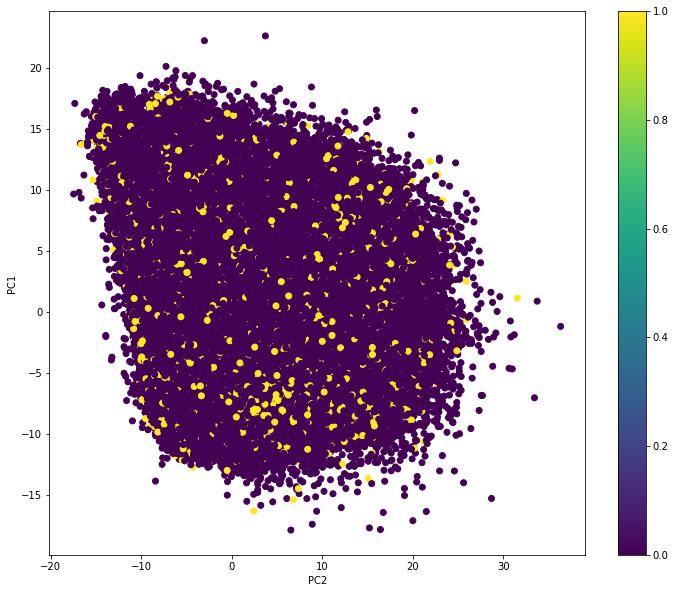

In [37]:
fig = plt.figure(figsize=(12,10))
plt.scatter(X_reduc[:,0], X_reduc[:,1],c=df_train1['TARGET'],cmap="viridis")
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.colorbar()

# <font color='blue'/>**Préparation des données pour le pipeline**

---

## **Transformation et encodage des données avec le pipeline**

Séparer les colonnes numériques des colonnes catégorielles

In [118]:
num_features = make_column_selector(dtype_include=np.number)
cat_features = make_column_selector(dtype_exclude=np.number)

Définir les piplines numériques et catégorielles

In [119]:
num_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
# cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse=True))
cat_pipeline = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder(handle_unknown='ignore'))
#cat_pipeline = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder())

Processus de transformation des données en forme de pipeline

In [120]:
preprocessor = make_column_transformer((num_pipeline, num_features),
                                       (cat_pipeline, cat_features))

Fonction pour extraire les noms des colonnes du transformateur

In [121]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [f for f in column]

        return [f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

# <font color='blue'/>**Modèle de régression xgboost**

---

Définir X et y

In [46]:
# X = df_imputed.iloc[ :, 2:216]
X = X_reduc
y =  df_train1.iloc[ :,1].values

Splitter les données en train et test

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=30)

Nombre de valeurs manquentes

In [55]:
print('Missing: %d' % sum(df_train1.isna().sum()))

Missing: 0


Créer l'objet XGBR

In [89]:
xgbr = XGBClassifier()

# xgbr = Pipeline([
#                  ("transform" , preprocessor),
#                  ("xgbr",XGBClassifier())
#                  ])

Entraîner le modèle

In [ ]:
xgbr.fit(X_train, y_train)

C:\Users\sweet\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Tester le modèle sur les données test et train

In [ ]:
print('Score test    : ', xgbr.score(X_test, y_test))
print('Score train   : ', xgbr.score(X_train, y_train))

Afficher les caractéristiques les plus importantes :

In [ ]:
import warnings
# Créer dataframe des caractéristiques les plus importantes
df_feature_importance=pd.DataFrame({'Features': df_train1.iloc[:,2:240].columns,
              'Features_importance':xgbr.feature_importances_
              })

df_feature_importance_20 = df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20)
# df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20).to_csv('df_feature_importance.csv', index = False)

# Graphique des caractéristiques les plus importantes
fig, ax = plt.subplots()

ax = sns.barplot(x="Features_importance", y="Features", data=df_feature_importance_20, palette="husl")

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
fig.set_size_inches(7, 8)
ax.set_title("Les 20 caractéristiques les plus importantes\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

Définir les meilleurs hyperparamètres avec GridSearchCV

In [71]:
param_grid = {
                'xgbr__n_estimators': [20,40],
#                 'xgbr__alpha':[0],
#                 'xgbr__max_features': ['auto'],
                'xgbr__max_depth': [5],
#                 'xgbr__subsample': [1],
#                 'xgbr__validate_parameters':[False],
#                 'xgbr__learning_rate':[0.29],
#                 'xgbr__colsample_bytree': [0.22],

              }

grid  = GridSearchCV(xgbr, param_grid, cv=5)
grid.fit(X_train, y_train)

[18:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "xgbr__alpha", "xgbr__max_depth", "xgbr__n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:30:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "xgbr__alpha", "xgbr__max_depth", "xgbr__n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:43:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=4,
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', vali

GridSearchCV : Le modèle avec le meilleur score

In [72]:
grid.best_score_

0.03674723479213673

GridSearchCV : Les meilleurs hyperparamètres utilisés

In [73]:
grid.best_params_

{'xgbr__alpha': 0, 'xgbr__max_depth': 5, 'xgbr__n_estimators': 20}

GridSearchCV : Enregistrerle meilleur modèle

In [75]:
model_grid = grid.best_estimator_

Tester le modèle GridSearchCV sur les données test et train

In [76]:
print('Score test (GridSearchCV)  : ', model_grid.score(X_test,y_test))
print('Score train (GridSearchCV) : ', model_grid.score(X_train,y_train))

Score test (GridSearchCV)  :  0.042372855578904245
Score train (GridSearchCV) :  0.22401310520642437


Prédiction sur l'échantillon test

In [77]:
y_pred = model_grid.predict(X_test)

Ci-dessous le graphique de valeurs test et les valeurs prédites :

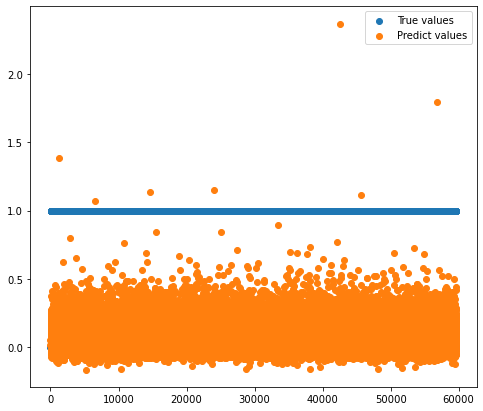

In [79]:
fig = plt.subplots(figsize=(8,7))

y_pred = model_grid.predict(X_test)

x_ax = range(len(y_test))

plt.scatter(x_ax, y_test, label='True values')
plt.scatter(x_ax, y_pred, label='Predict values')

plt.legend()
plt.show()